In [1]:
import torch
import random

import sys
sys.path.append("../../../lib")
import utility

In [2]:
res = torch.load("../../data/gpt-j/indirect_effect_1000_examples.pt")
res = random.sample(res, 100)

../../../lib/utility.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(7,5))


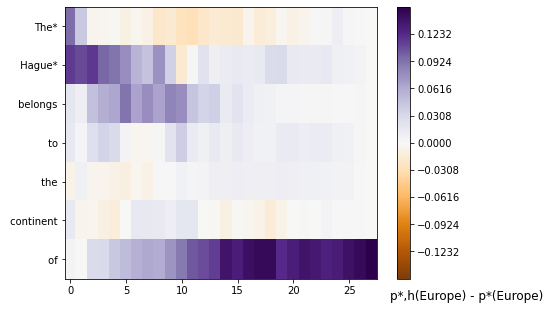

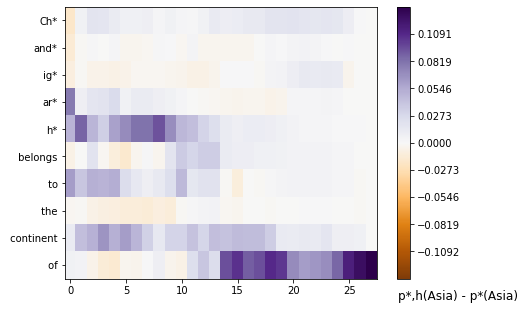

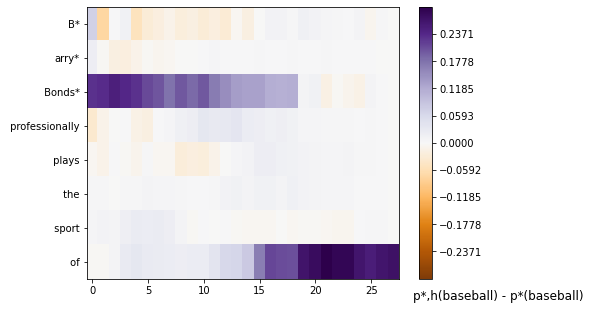

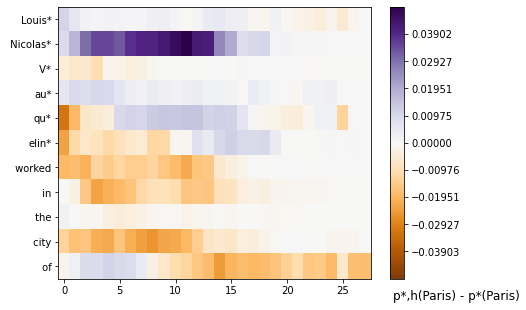

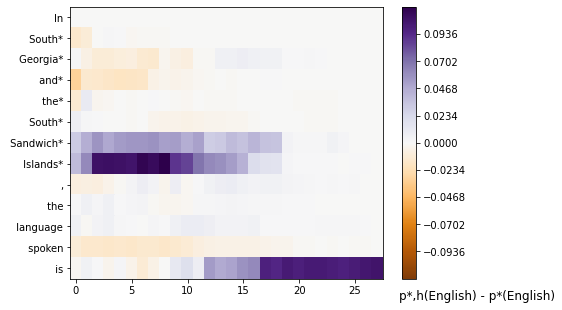

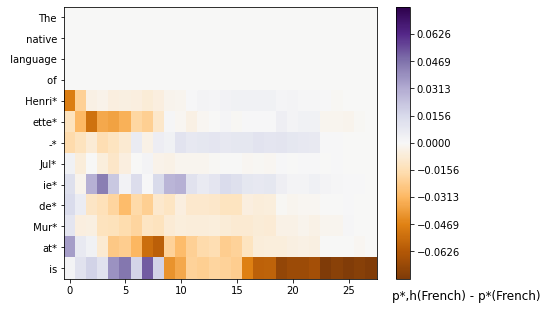

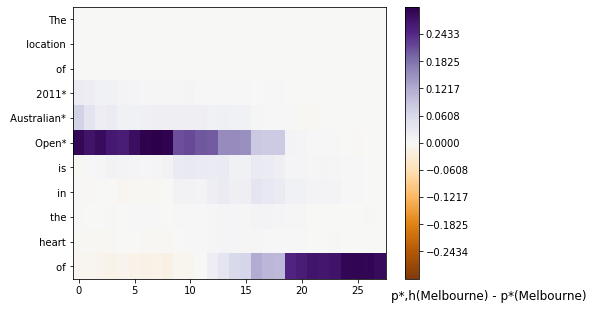

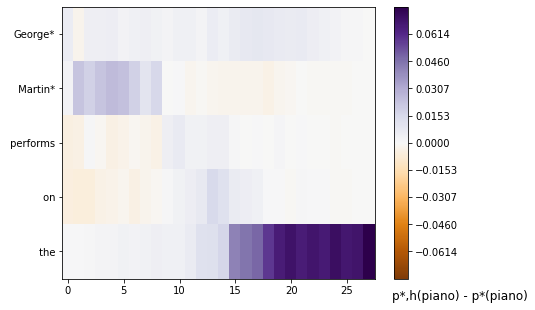

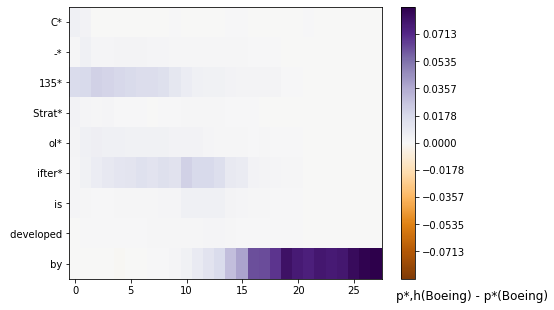

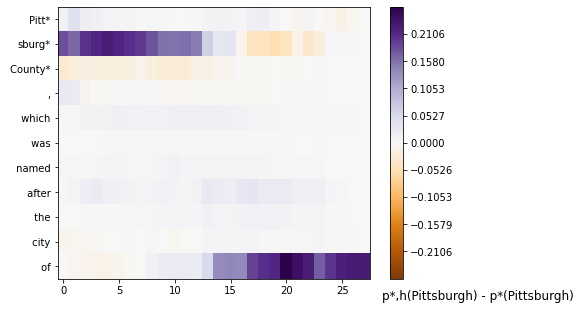

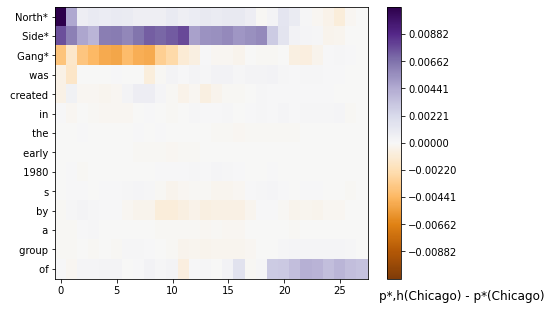

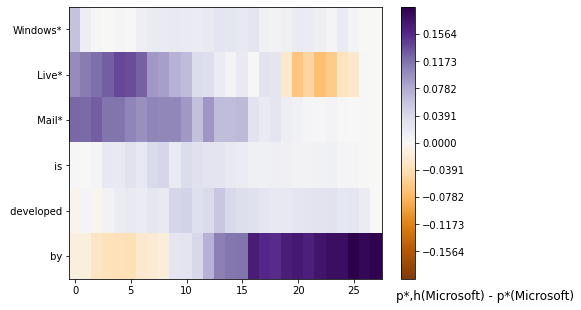

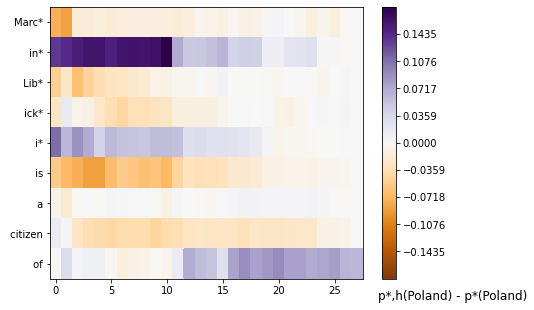

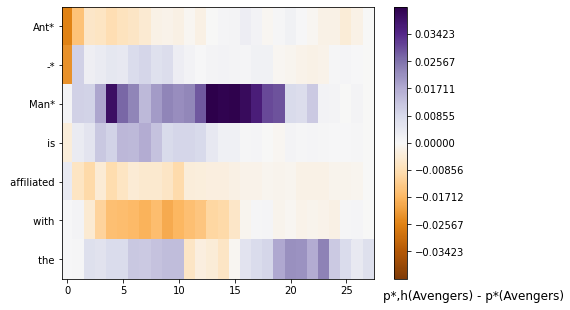

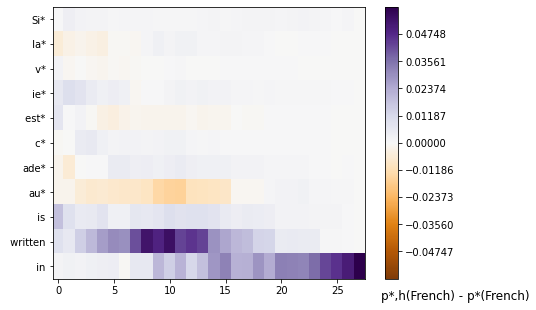

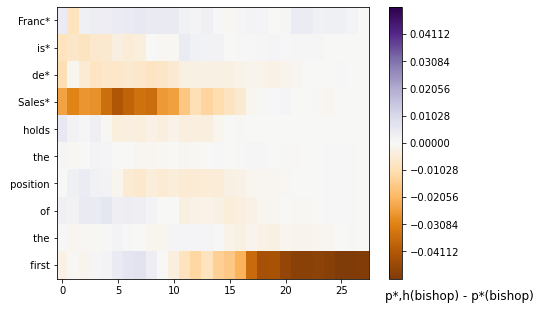

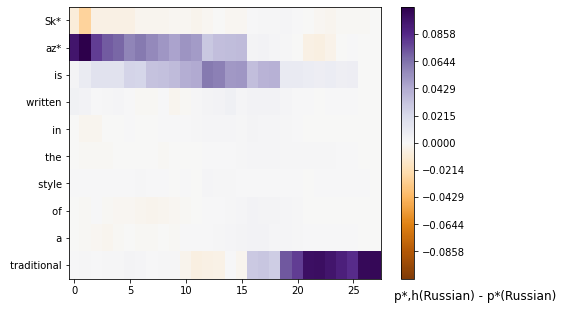

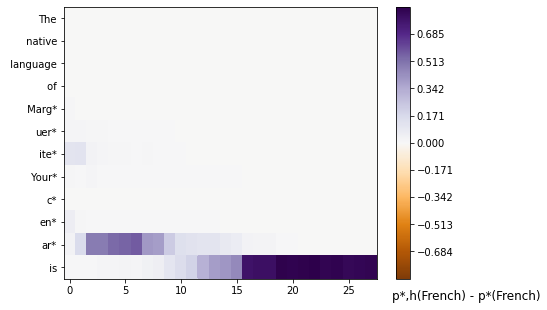

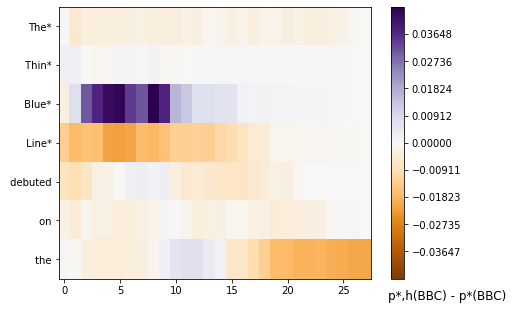

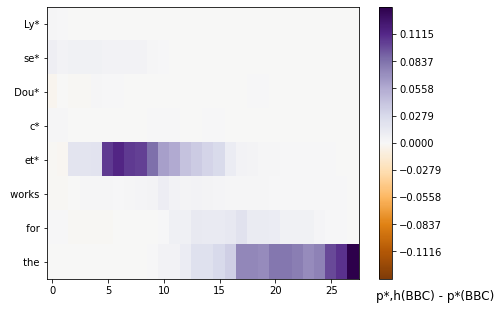

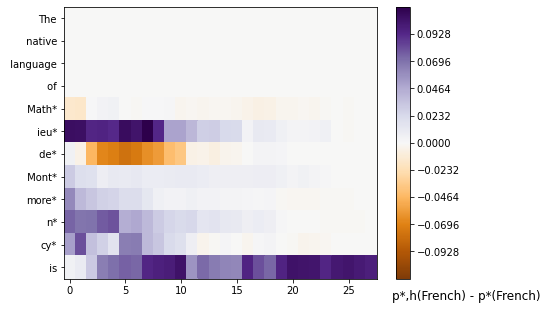

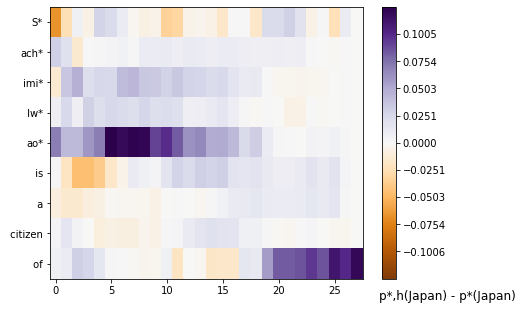

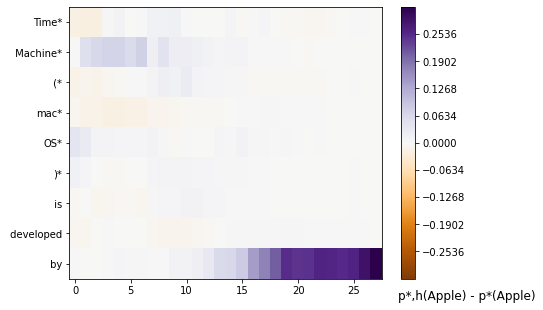

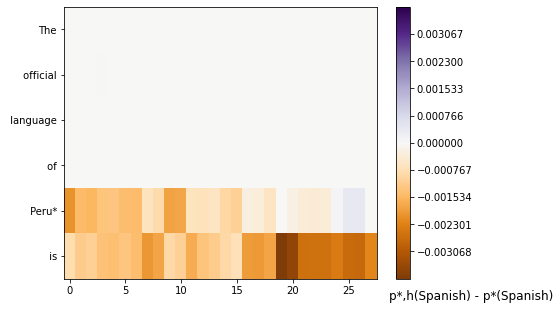

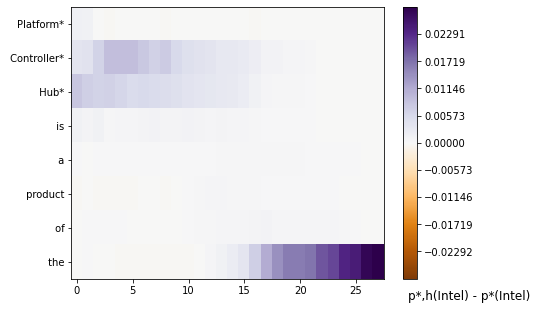

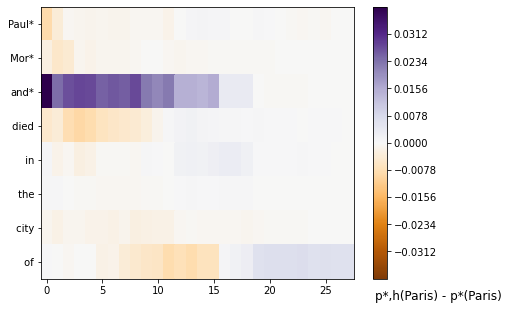

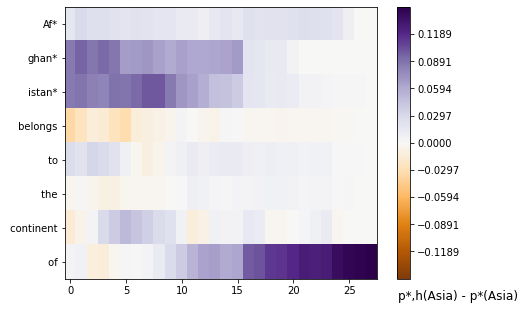

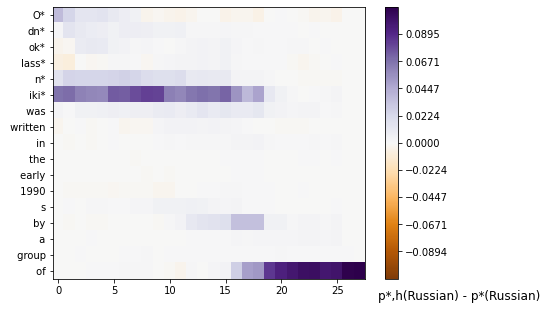

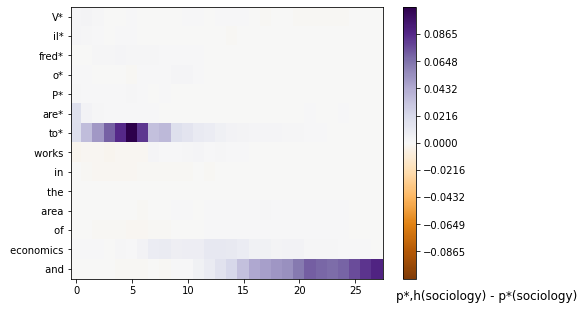

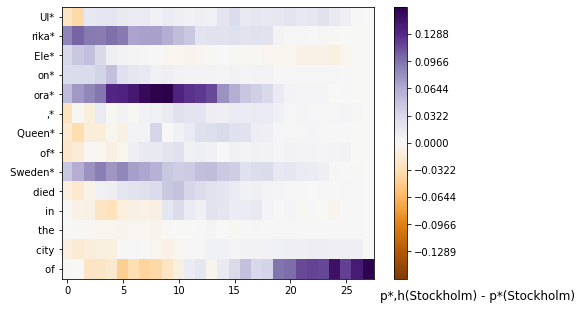

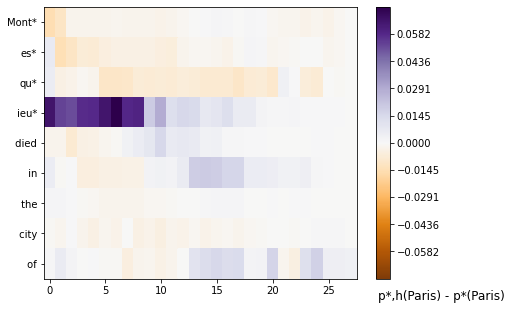

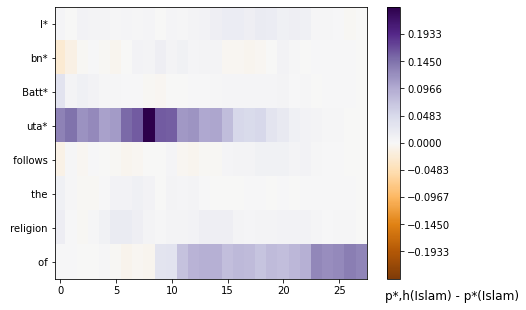

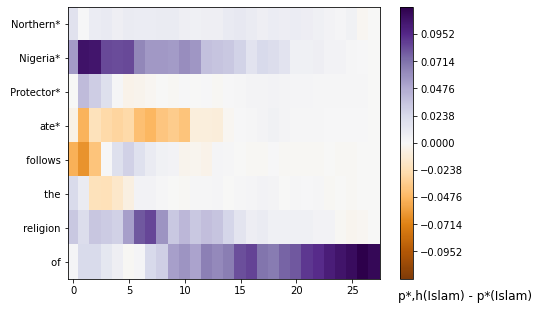

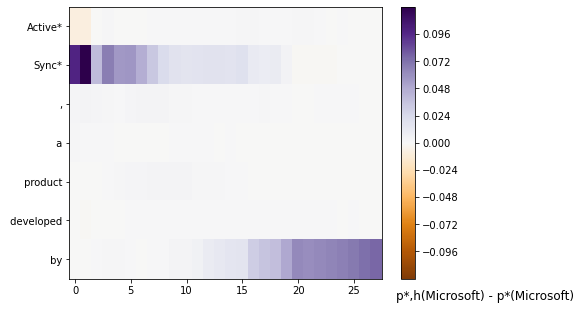

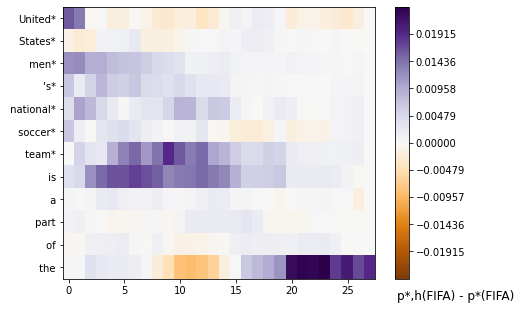

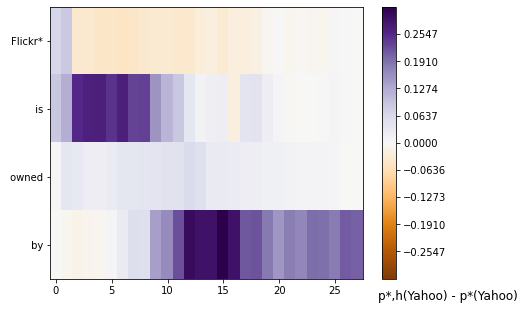

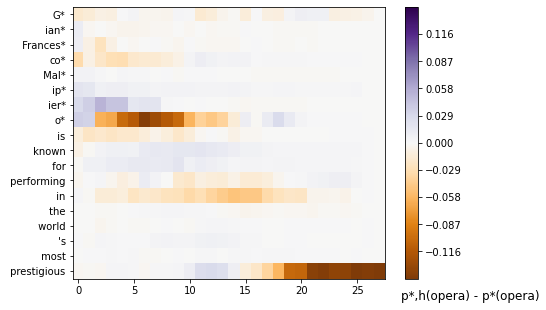

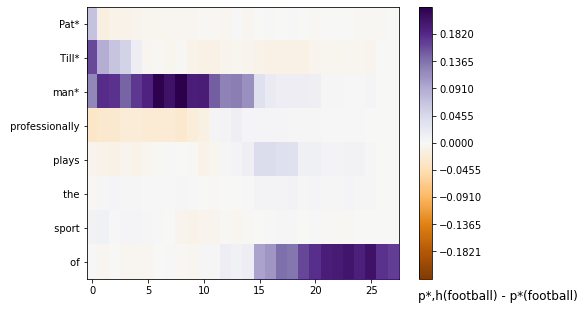

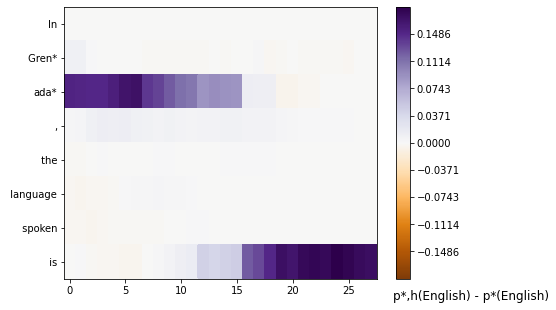

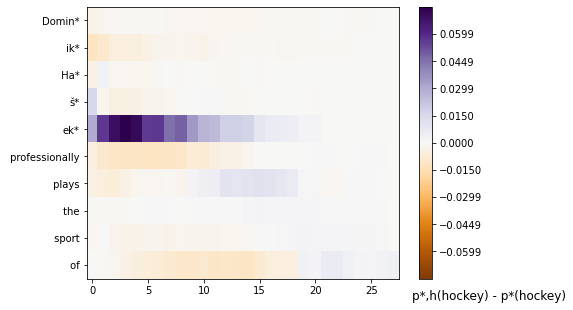

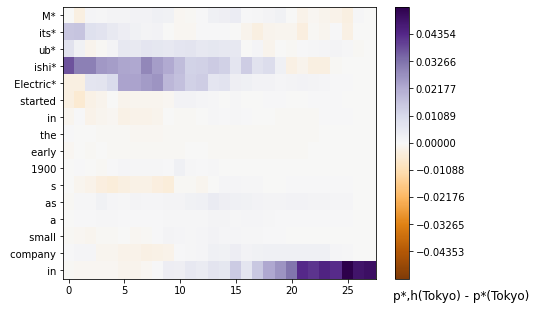

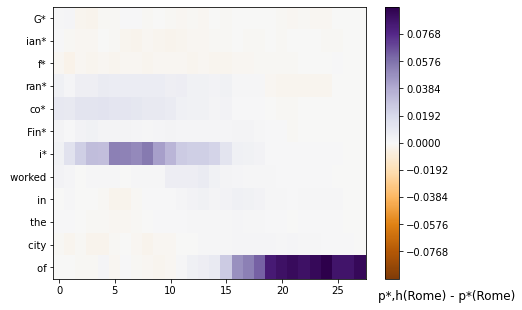

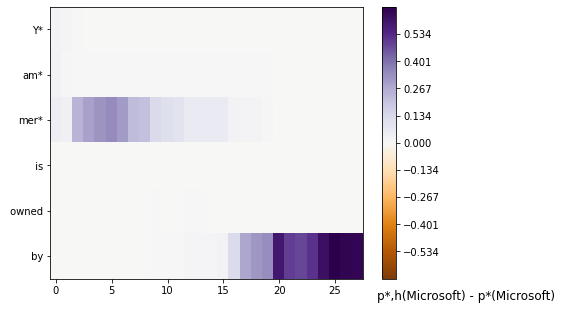

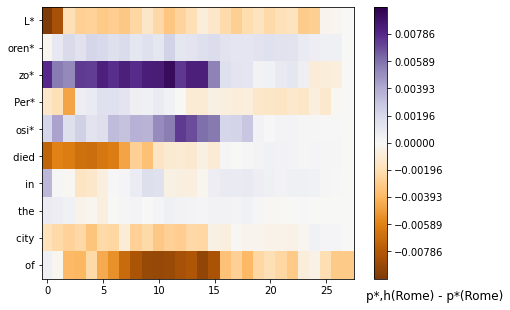

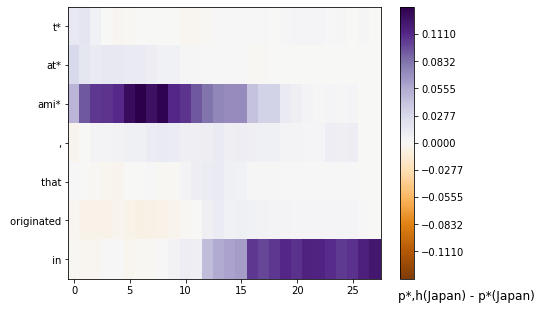

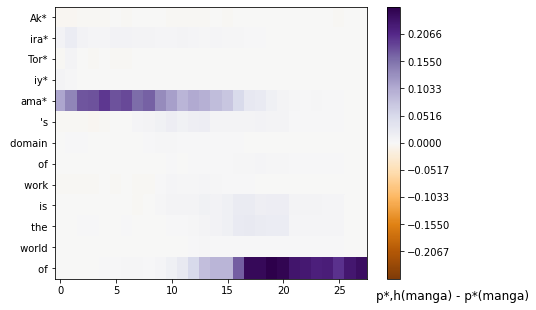

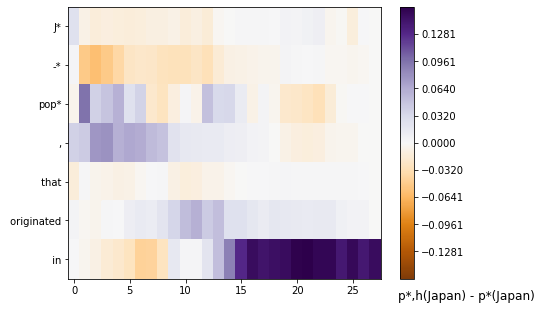

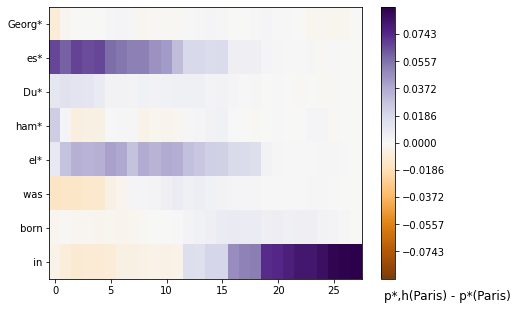

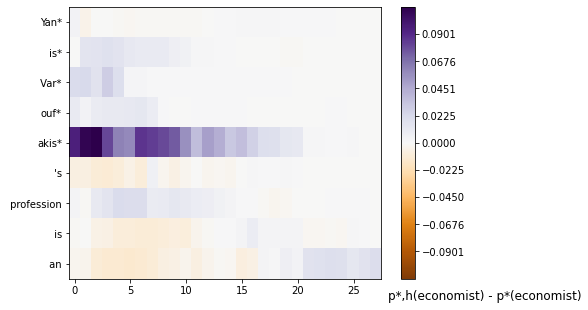

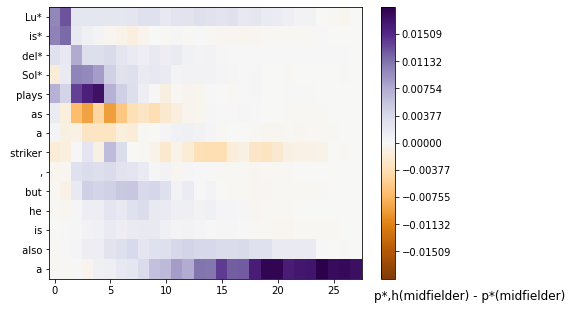

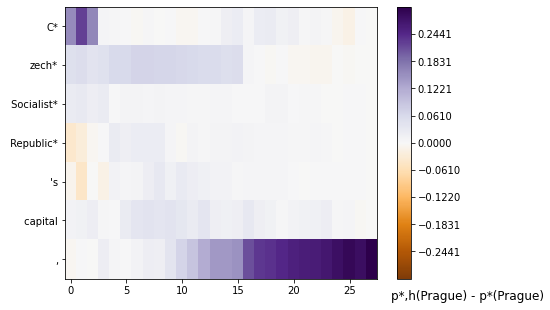

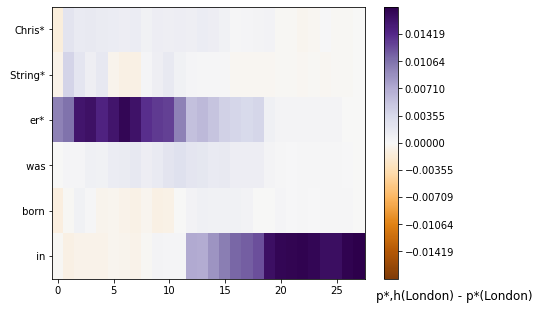

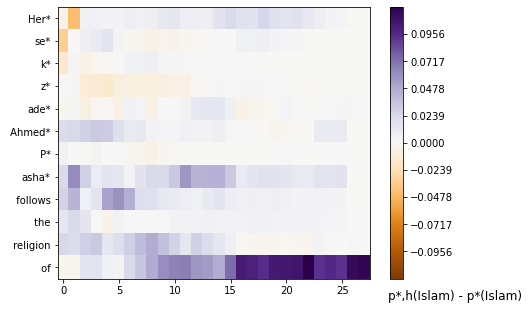

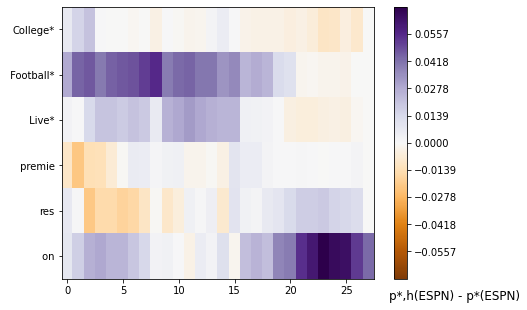

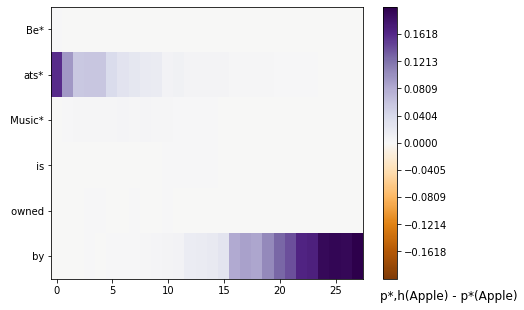

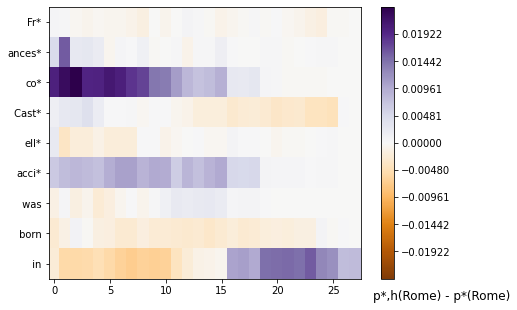

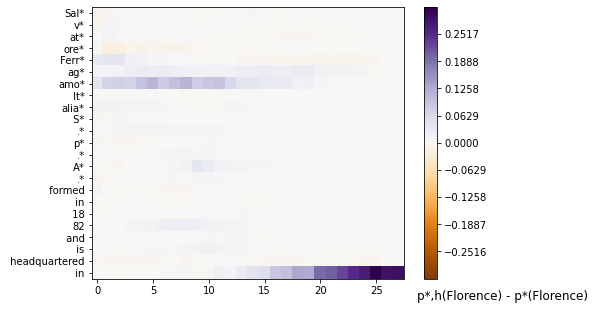

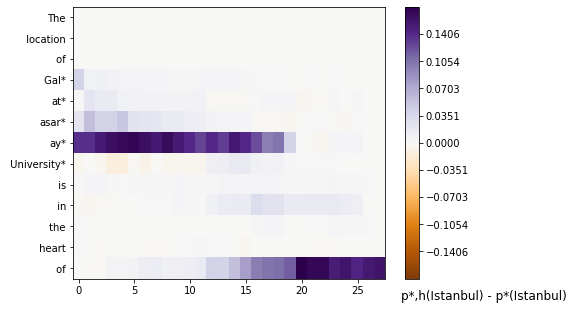

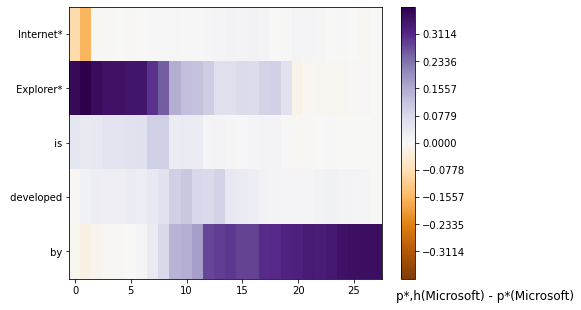

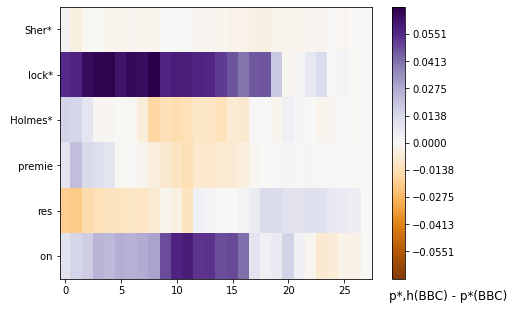

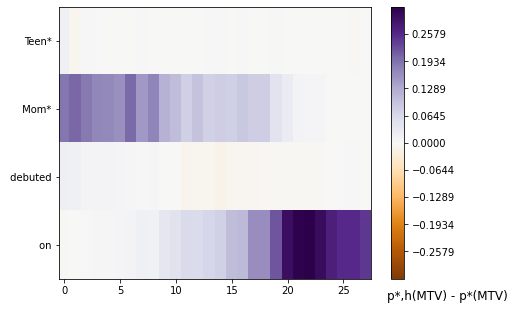

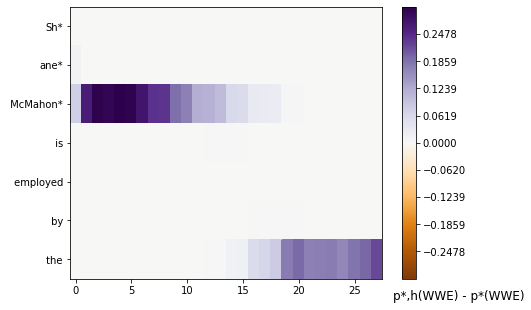

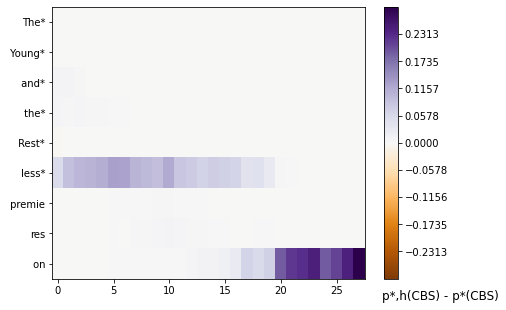

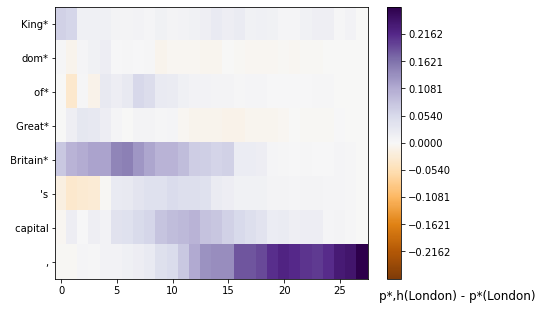

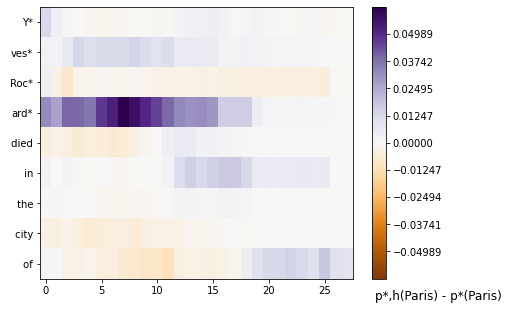

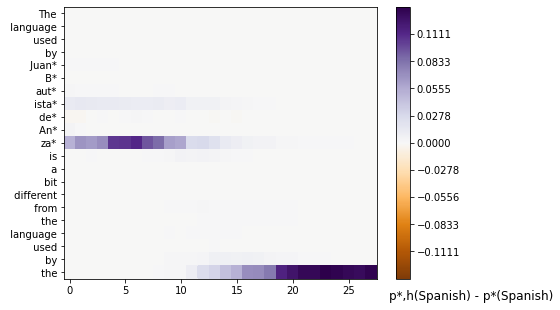

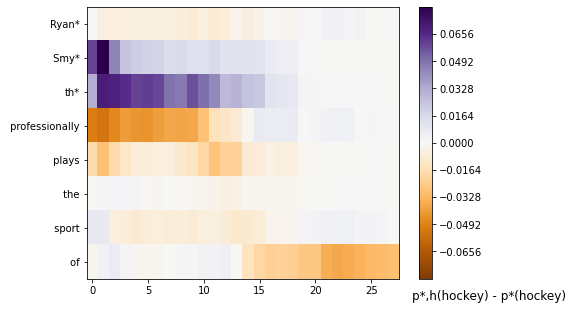

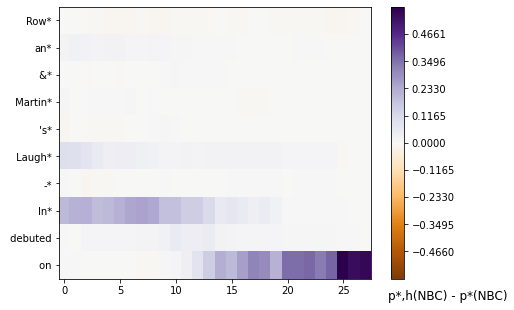

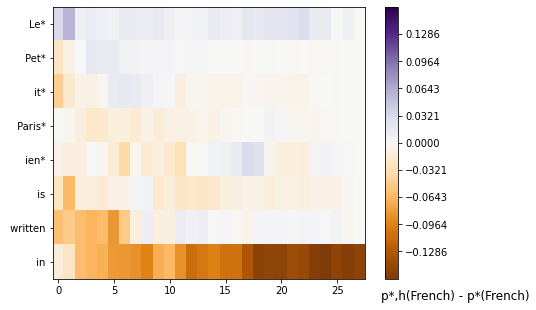

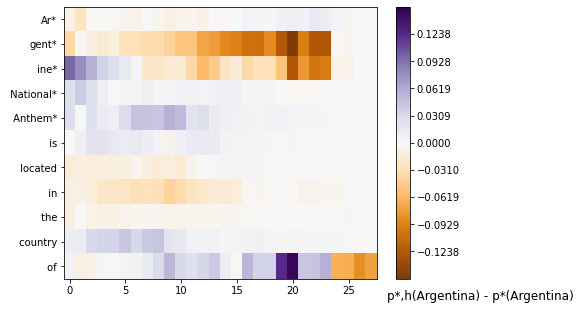

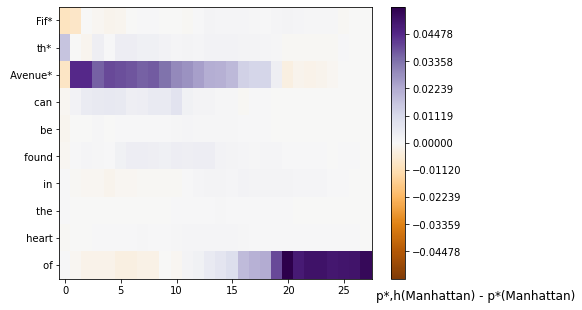

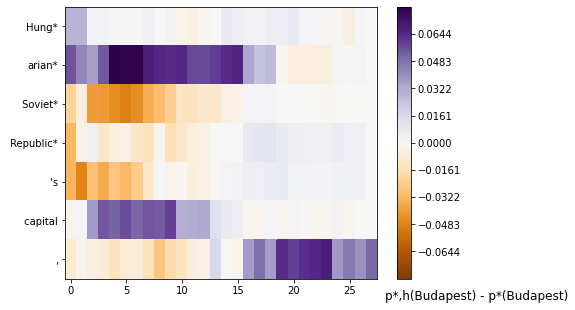

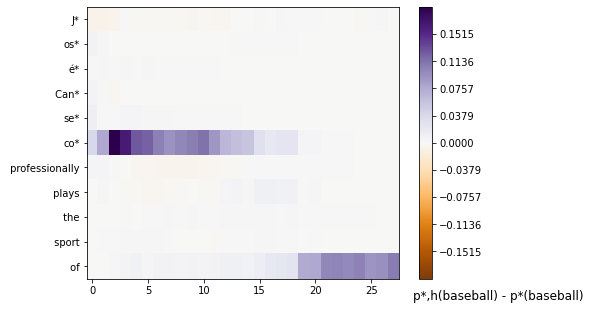

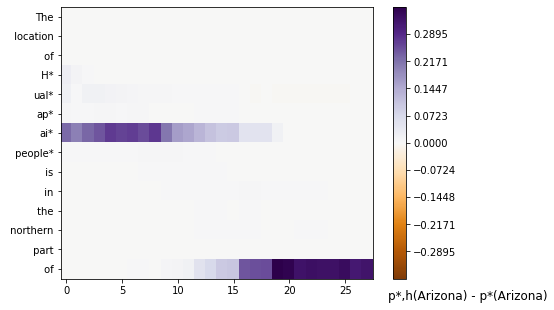

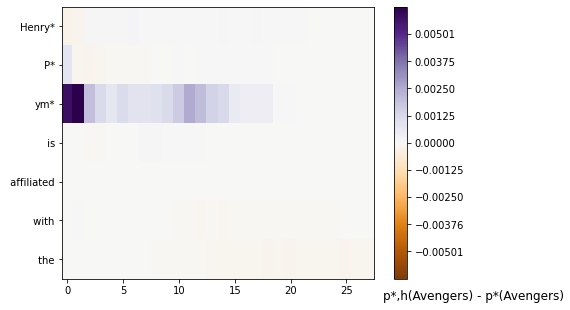

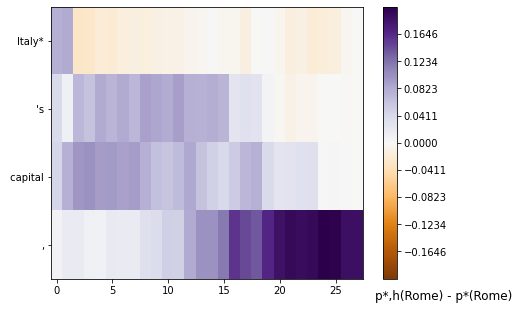

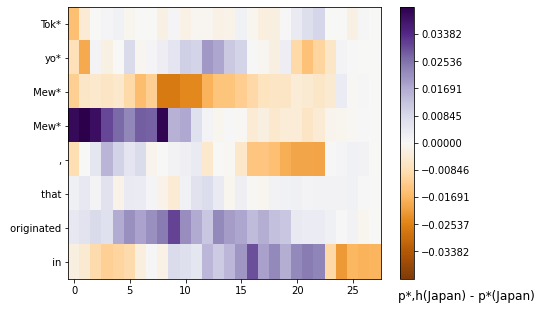

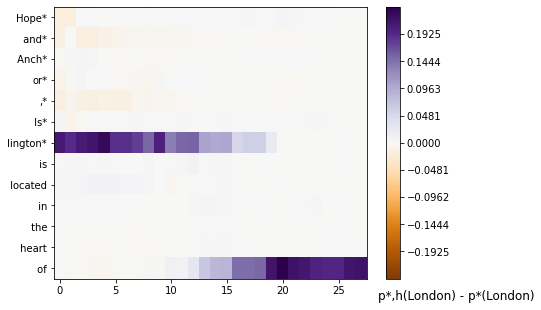

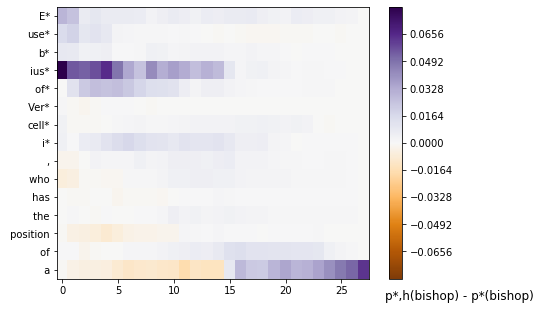

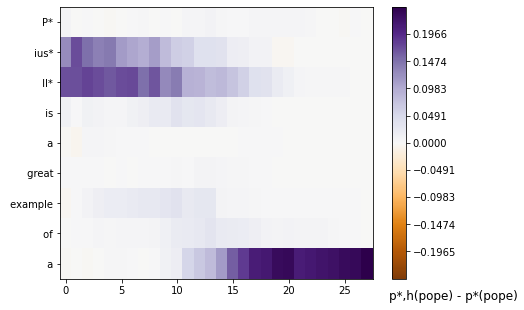

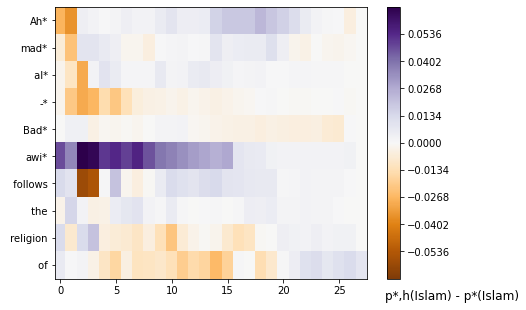

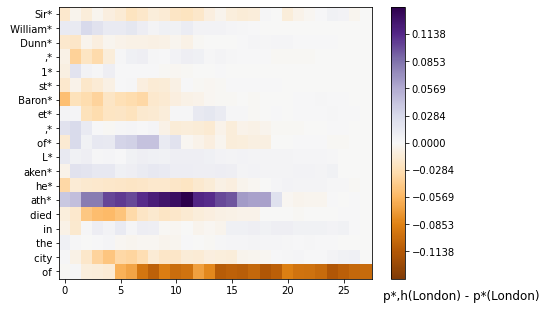

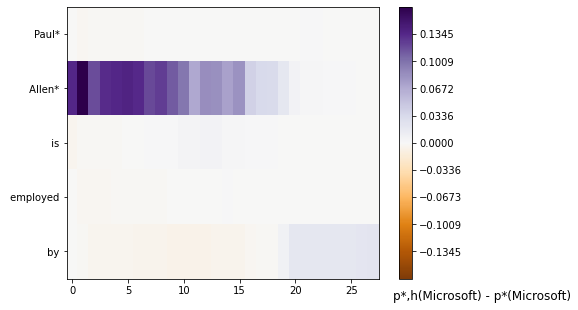

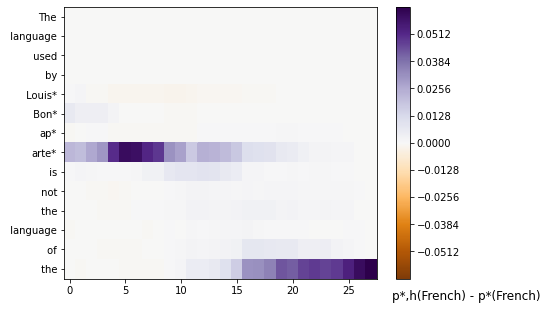

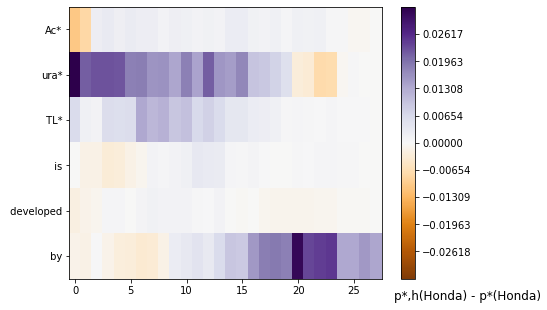

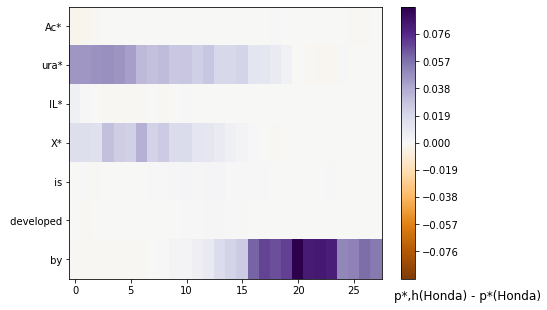

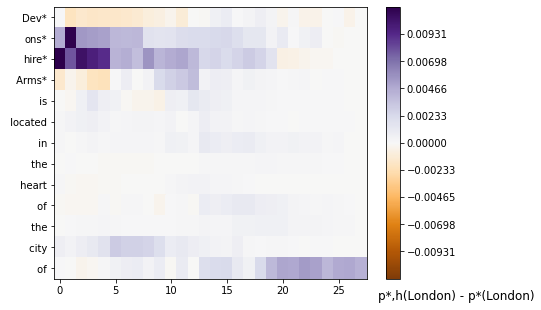

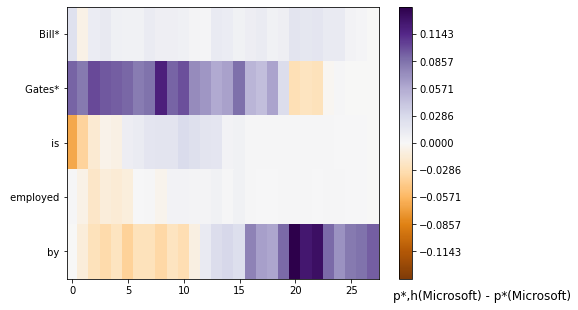

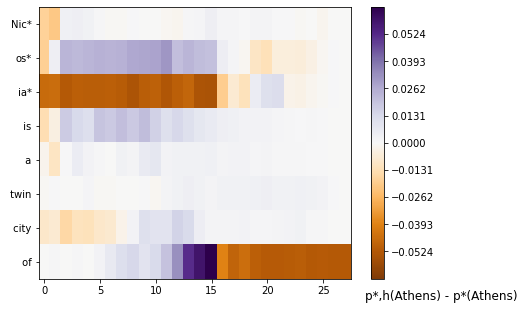

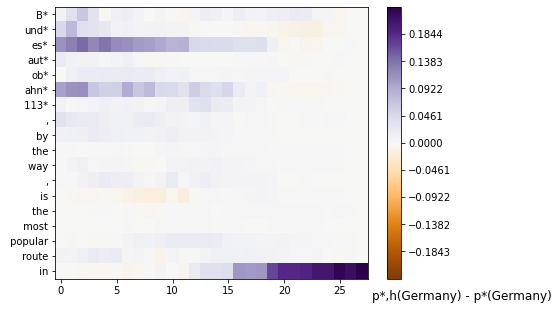

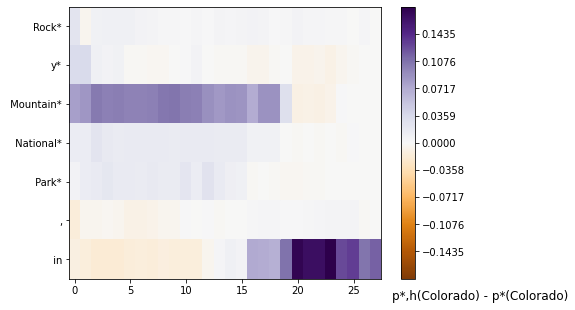

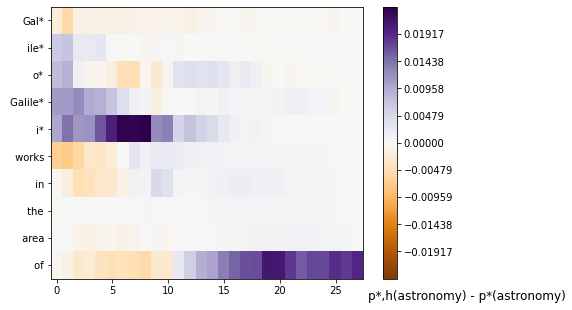

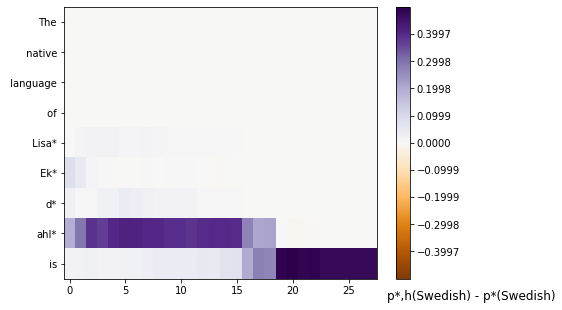

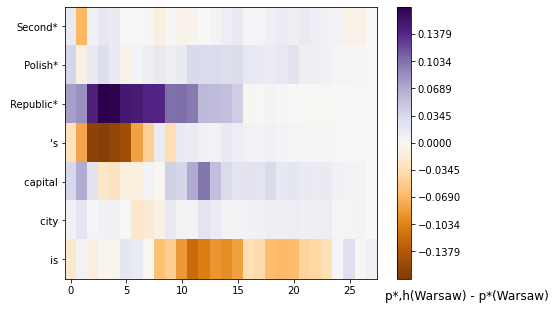

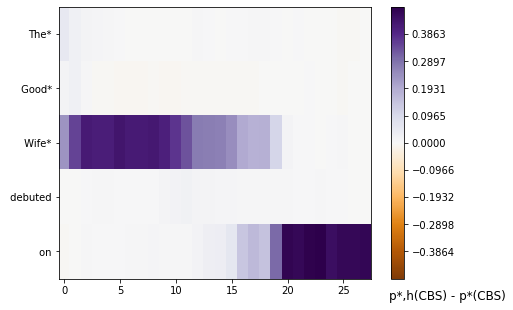

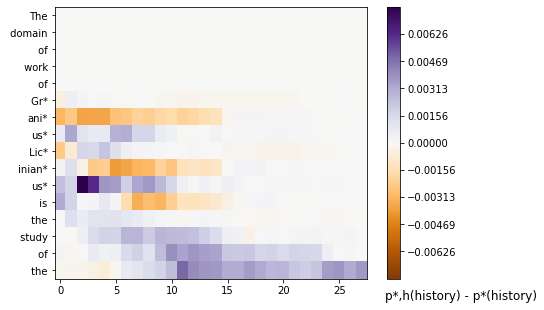

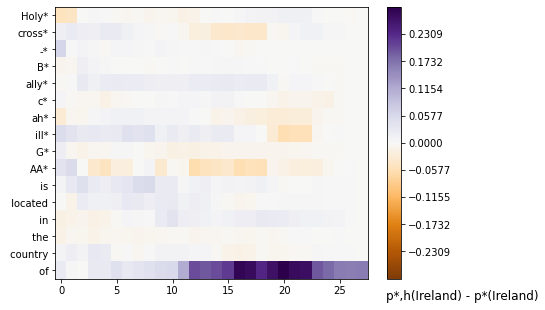

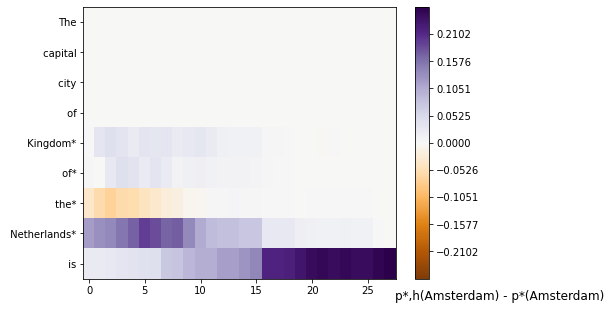

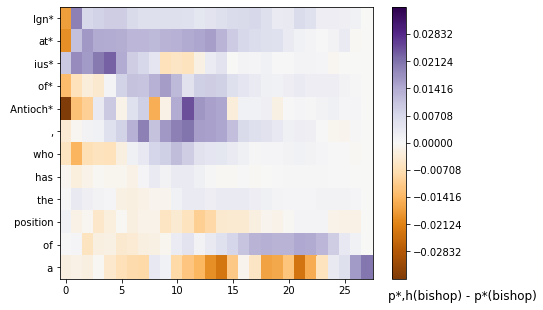

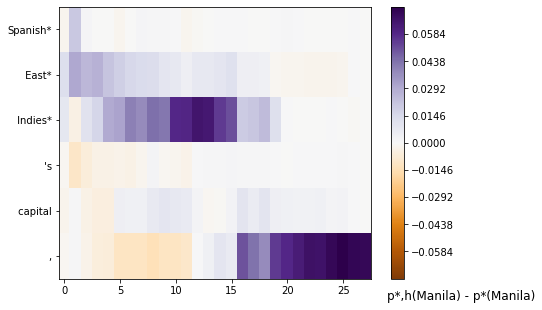

In [3]:
# no cutoff applied
for prob, access in res:
    text, tkens, num_layers, _, _ = access
    x = num_layers
    y = tkens
    bound = max(torch.max(prob).item(), abs(torch.min(prob).item()))
    incr = bound / 10000
    token = text.split()[-1]
    title = f"p*,h({token}) - p*({token})"
    color_schema = "PuOr"
    
    utility.plot_results(prob, x, y, -bound, bound, incr, title, color_schema)

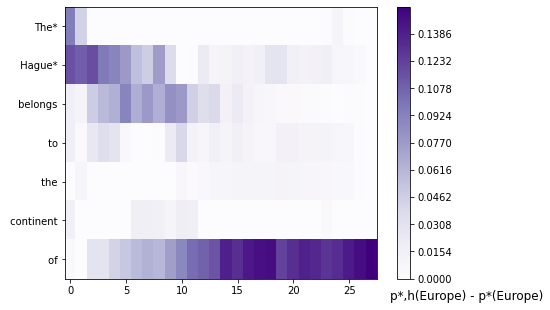

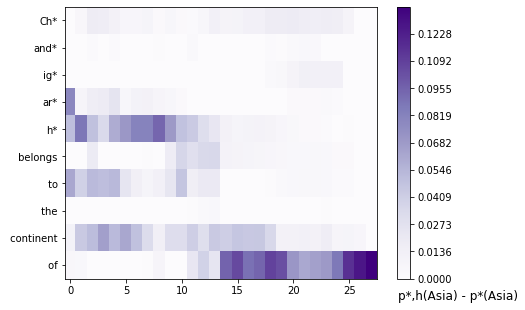

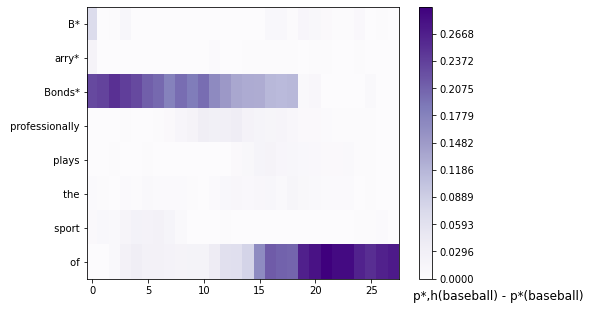

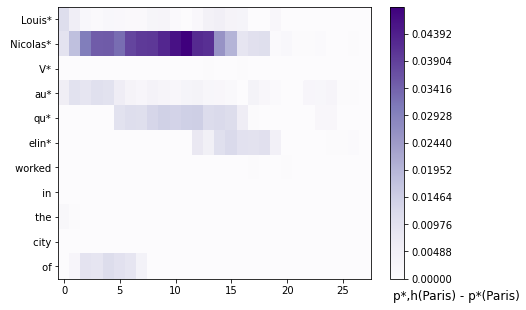

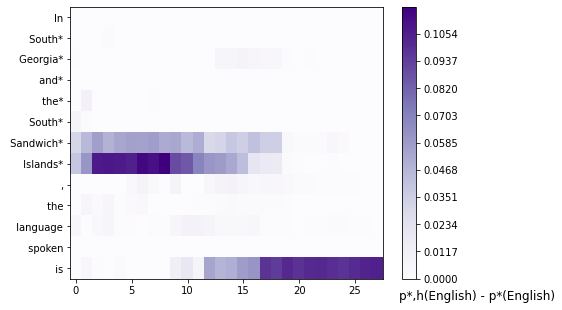

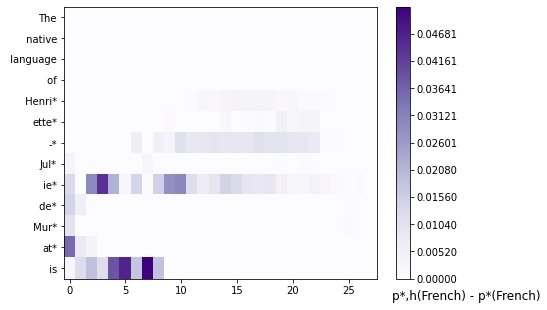

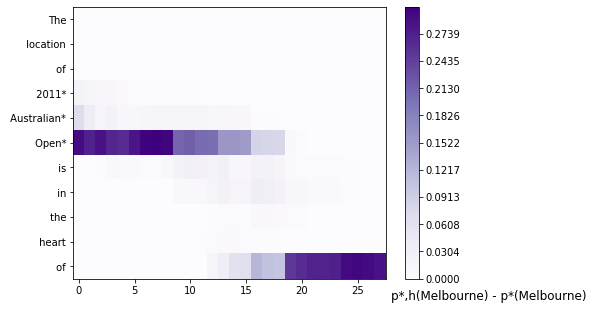

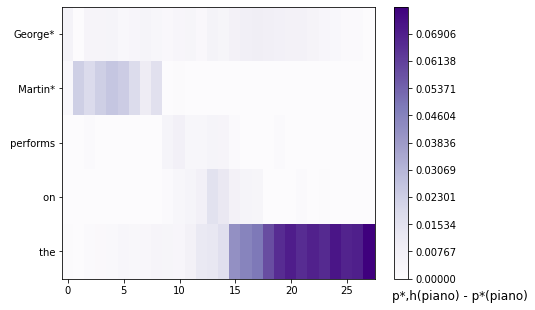

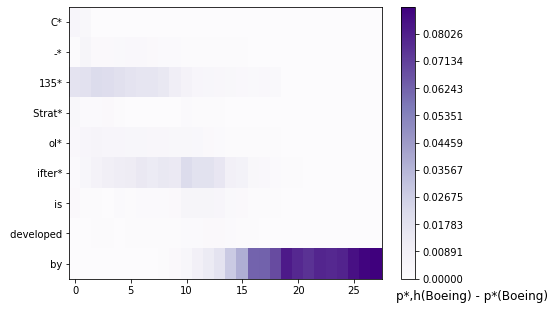

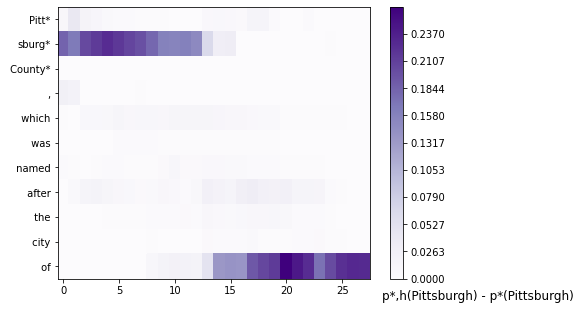

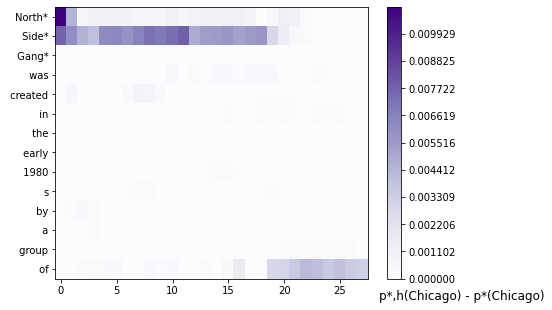

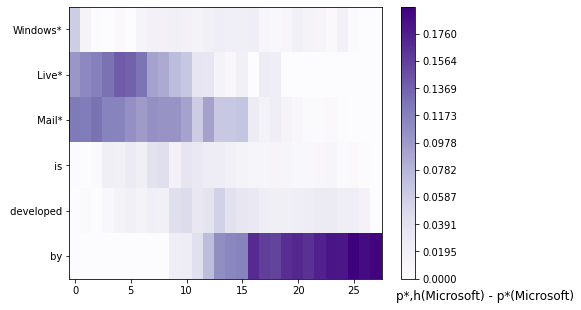

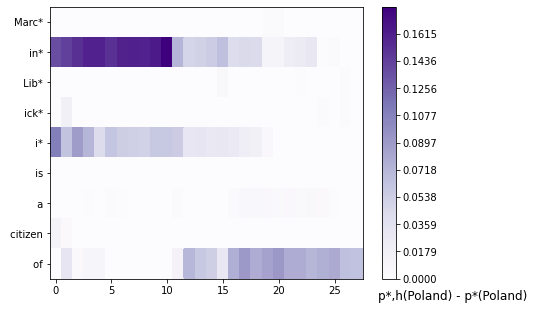

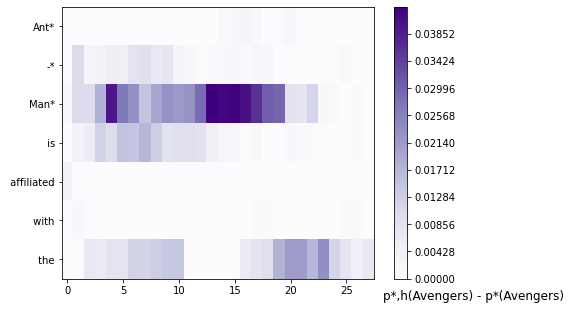

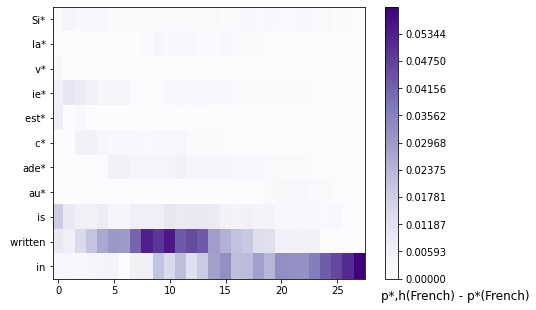

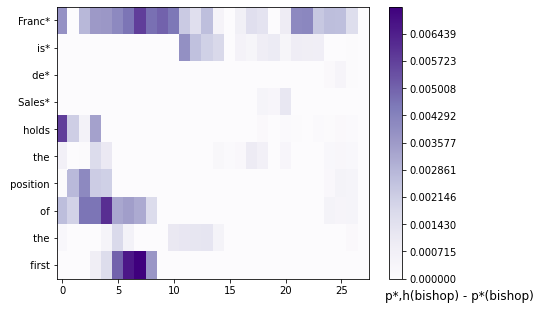

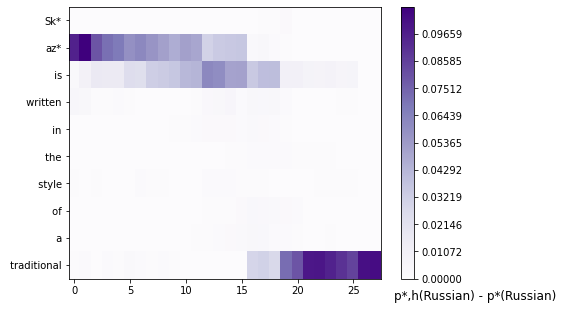

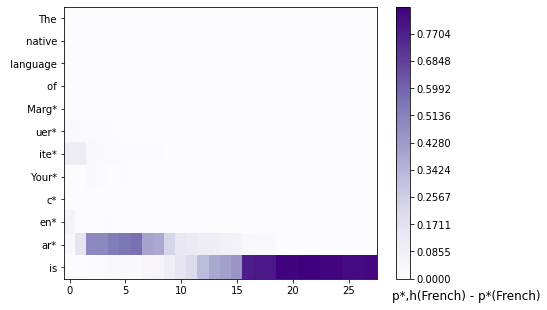

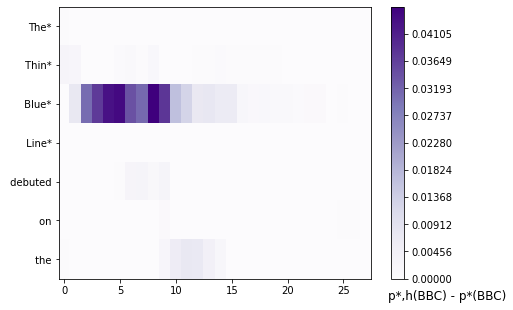

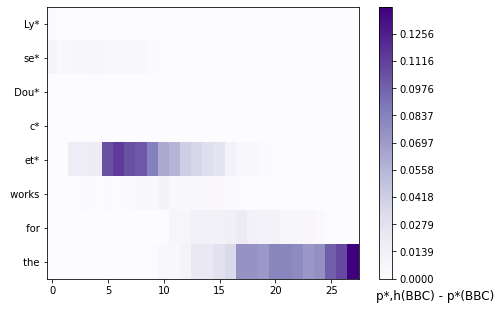

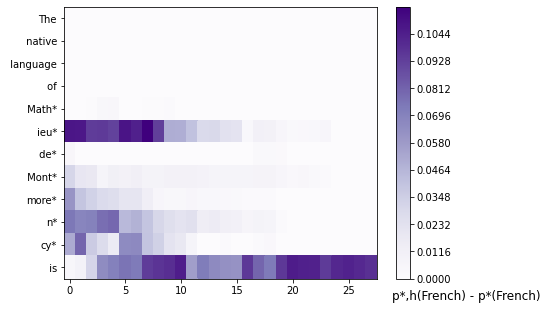

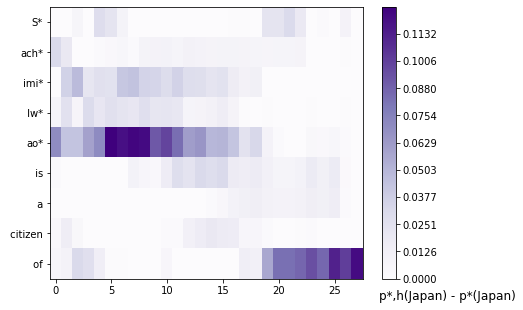

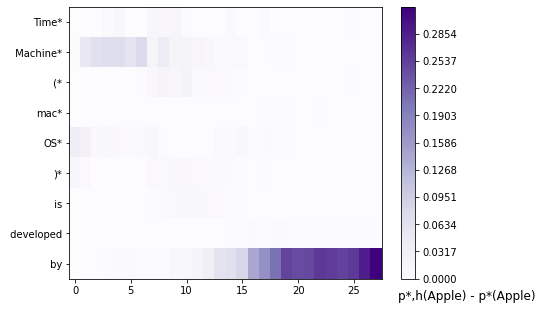

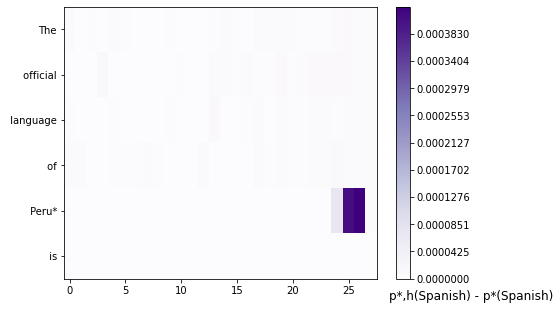

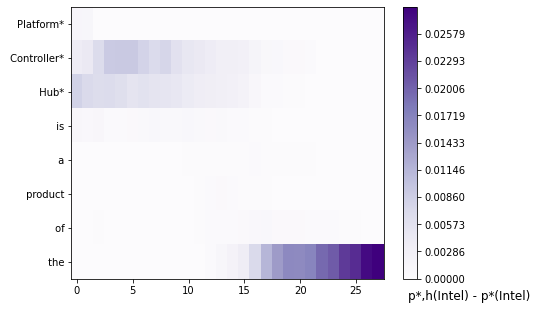

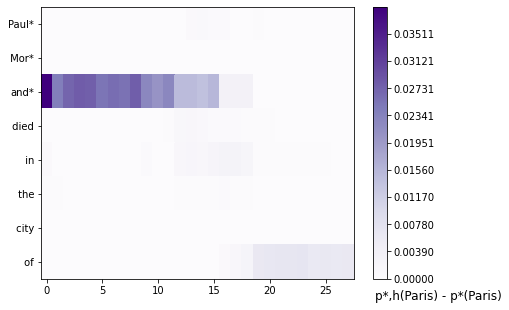

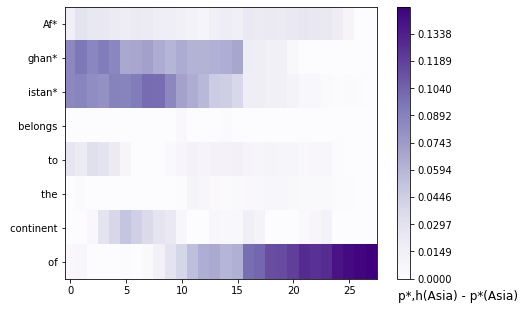

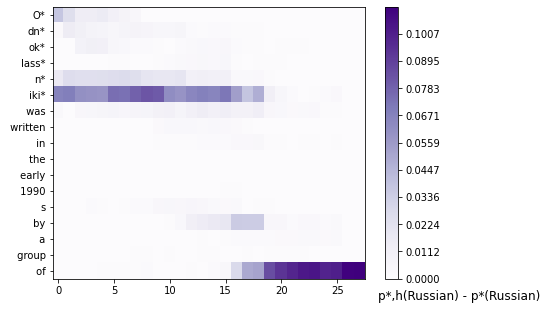

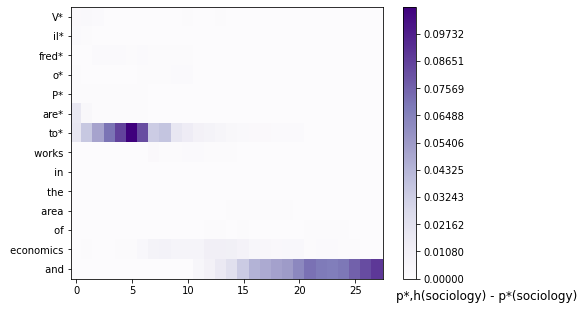

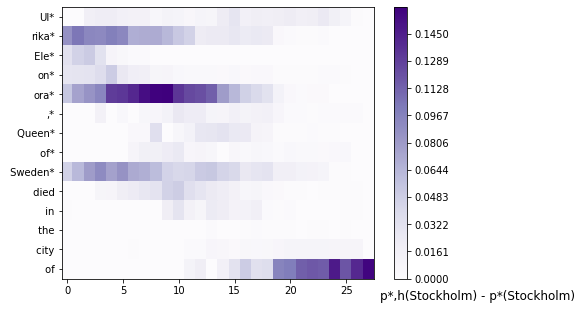

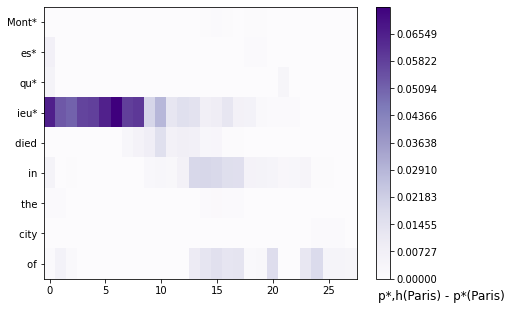

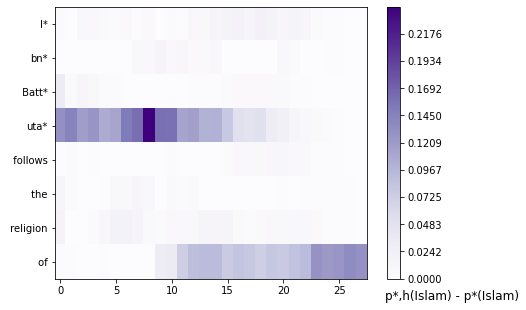

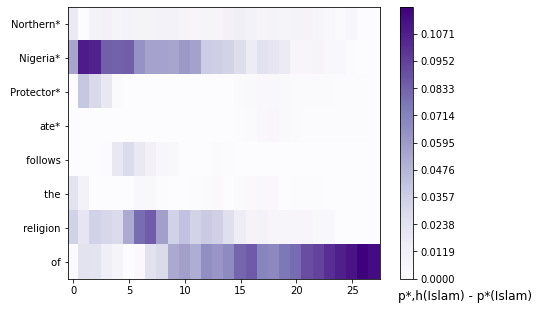

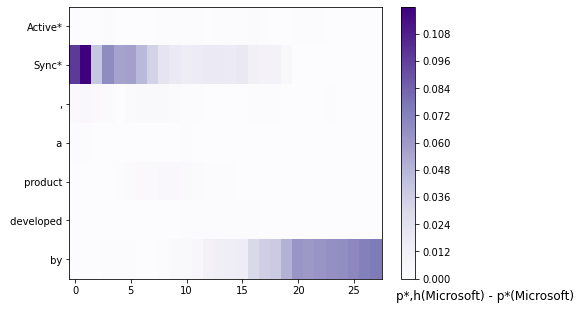

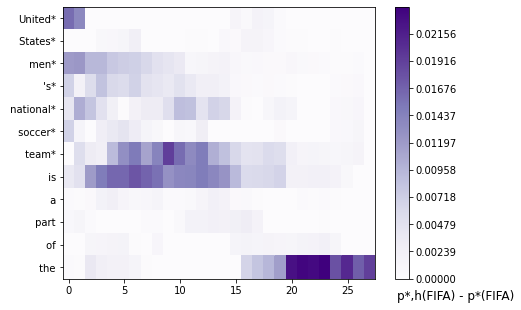

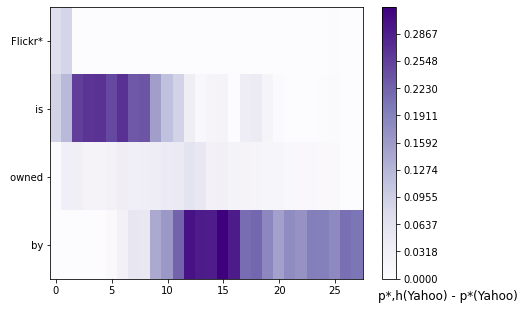

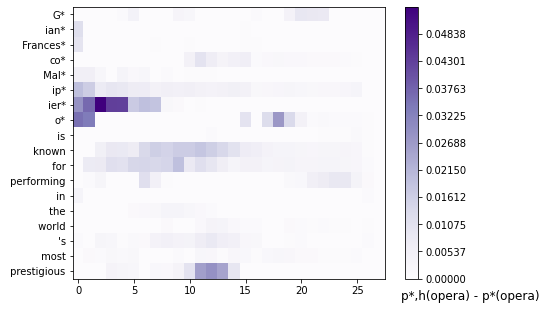

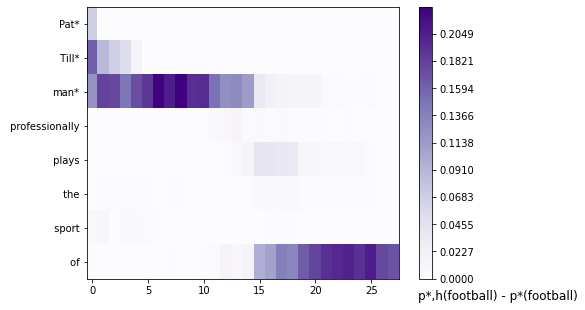

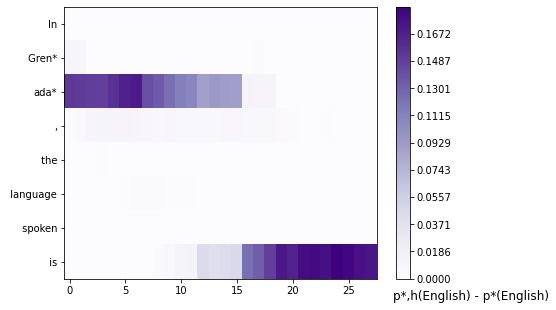

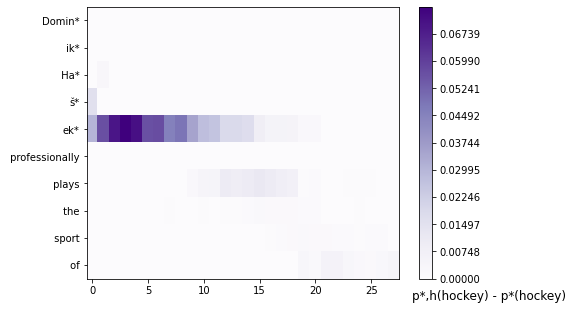

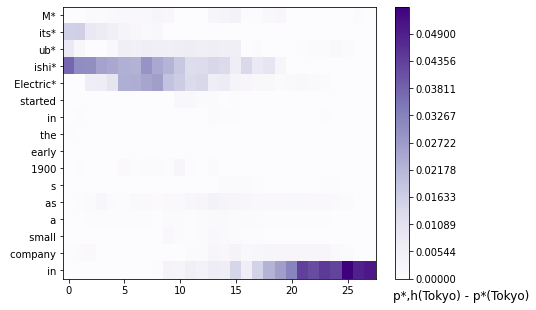

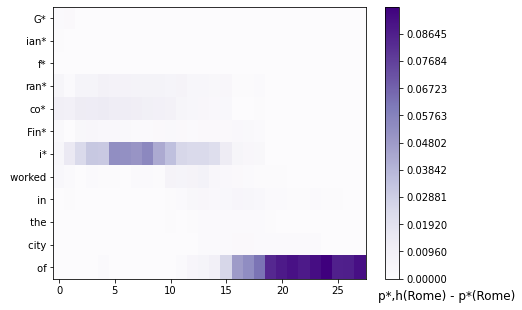

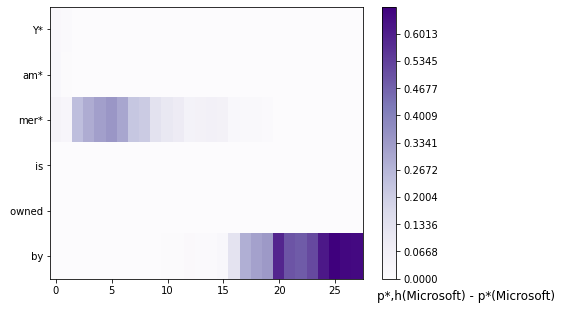

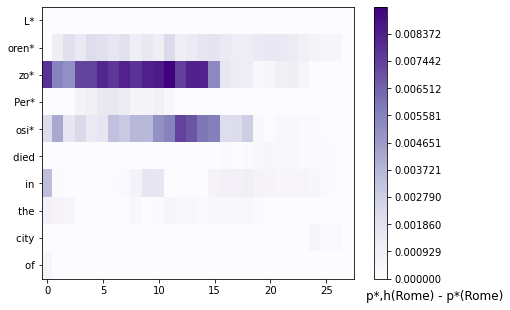

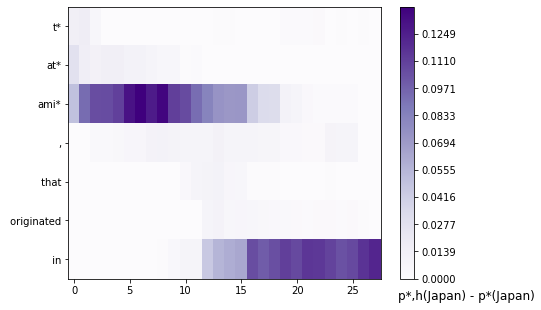

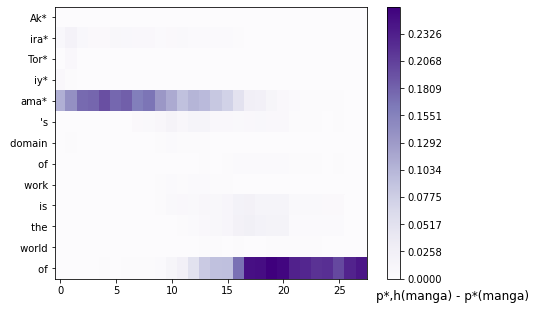

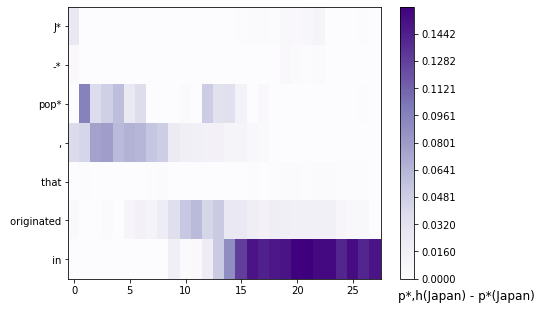

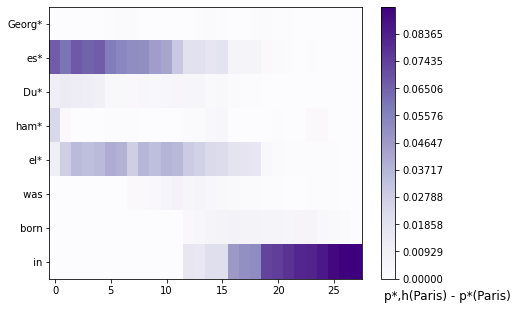

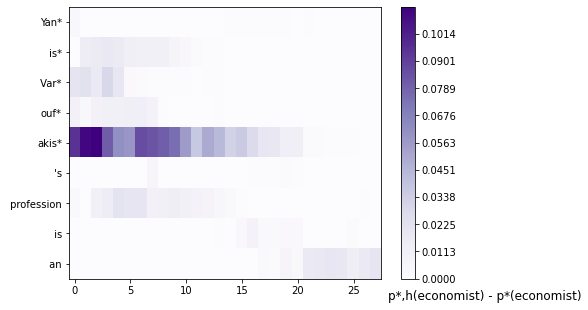

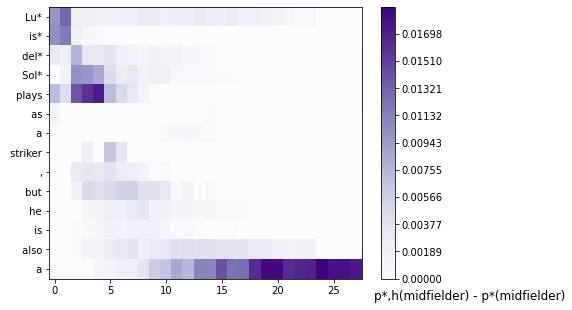

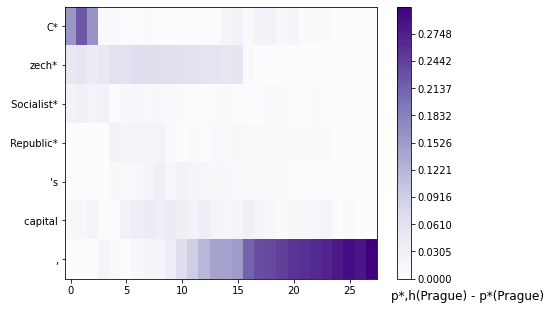

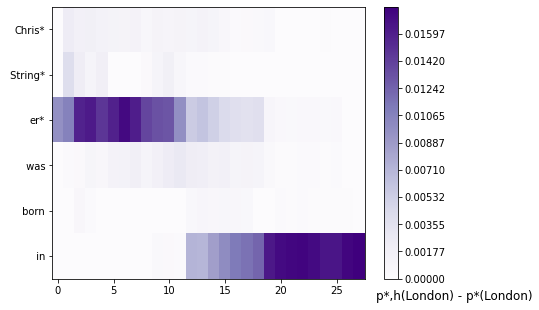

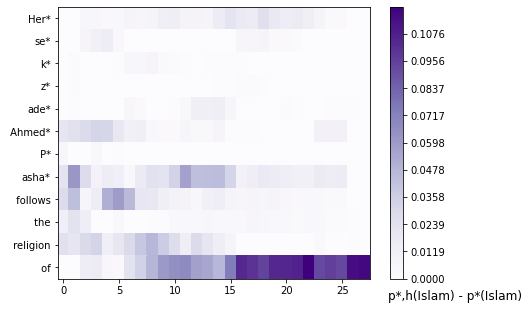

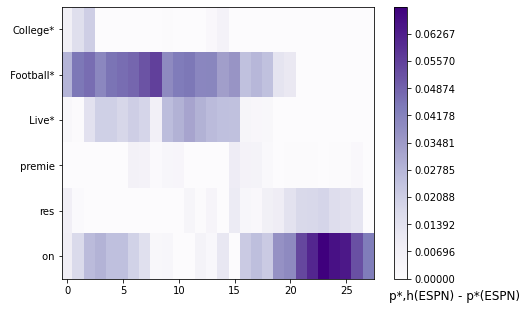

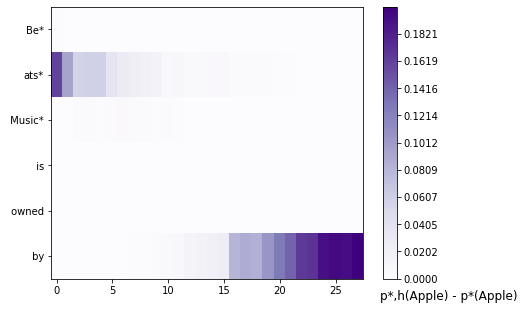

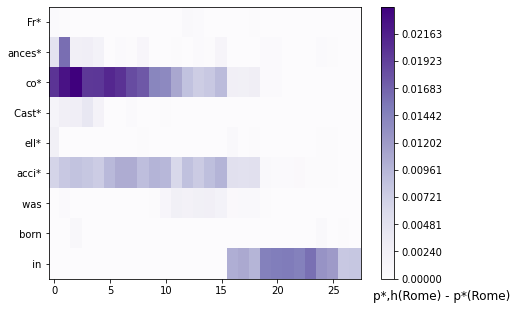

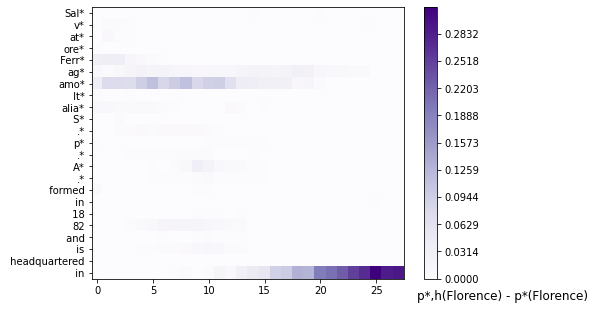

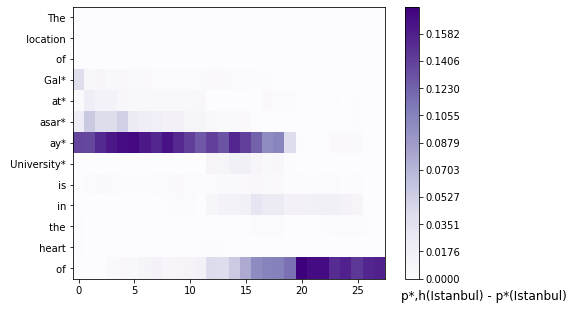

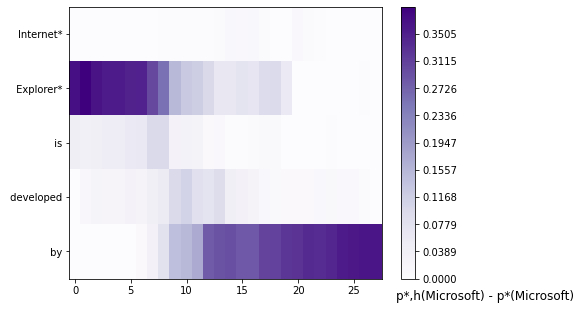

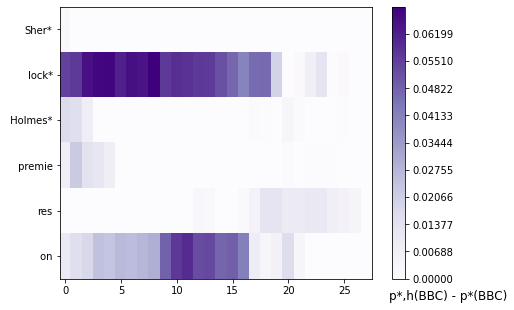

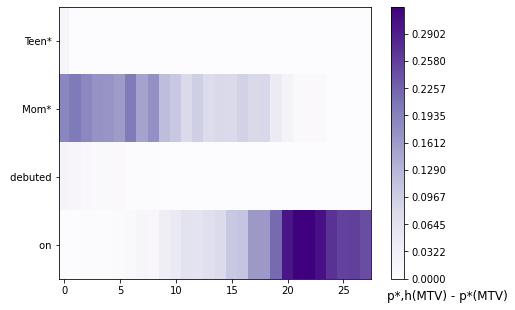

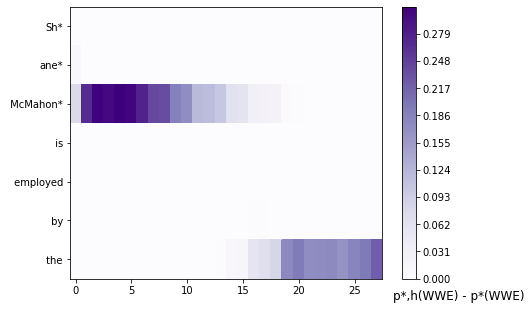

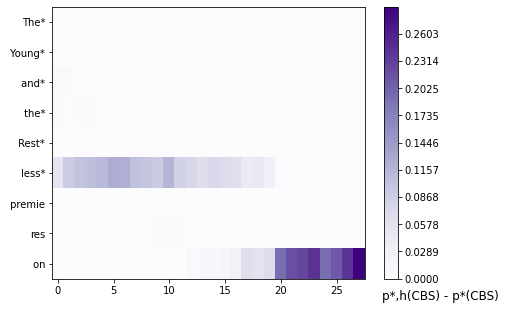

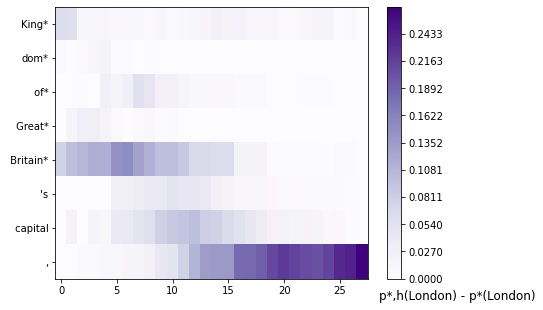

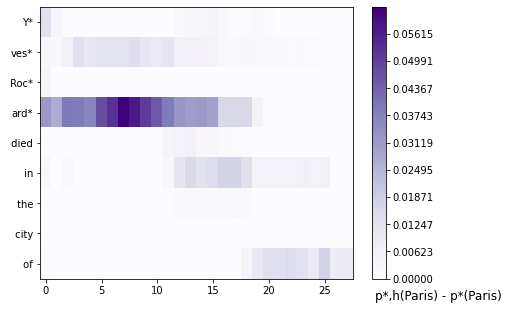

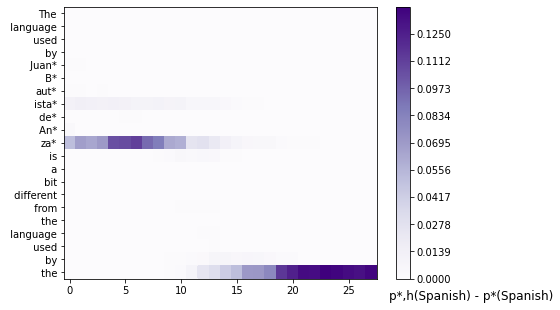

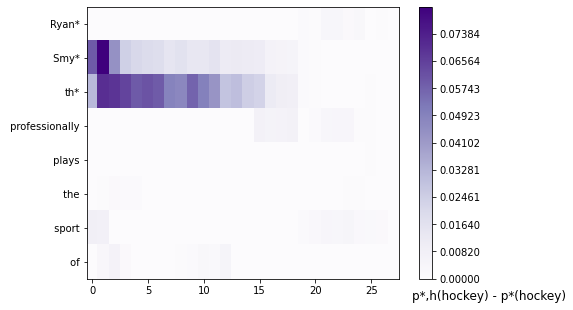

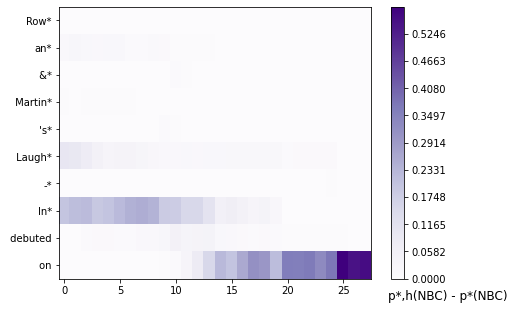

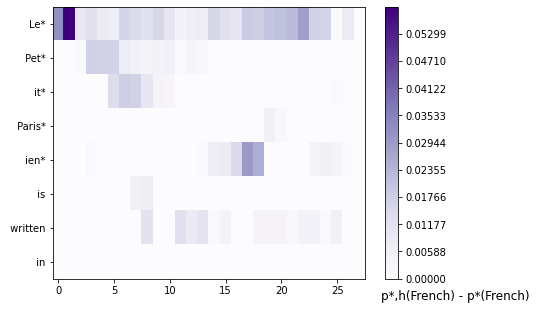

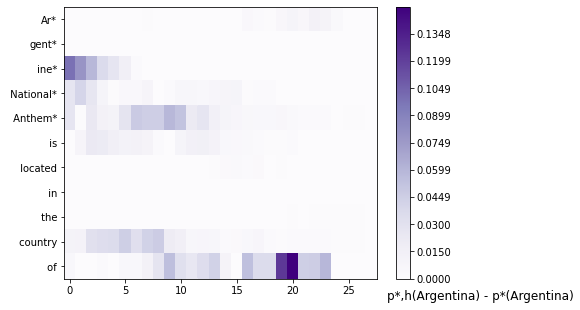

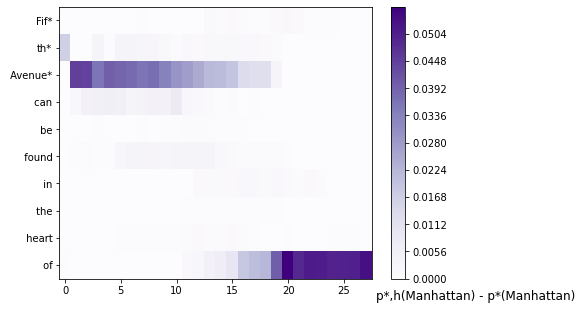

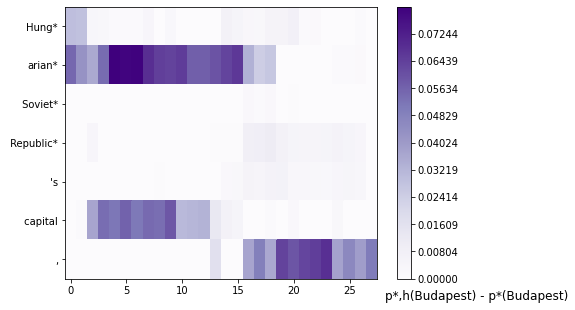

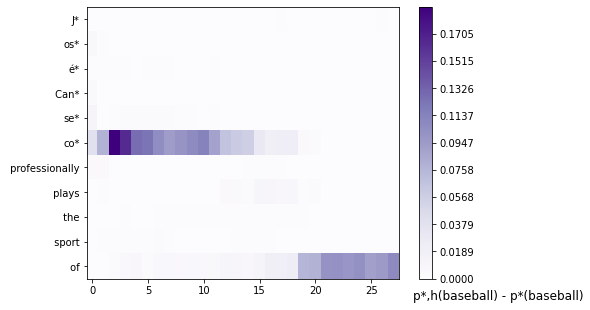

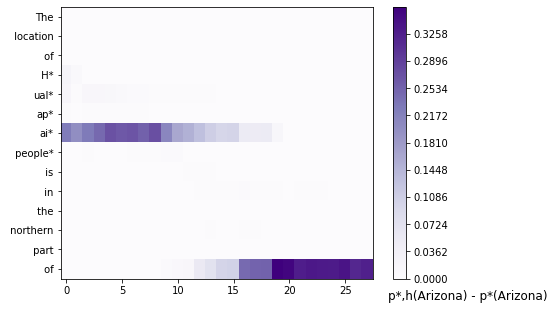

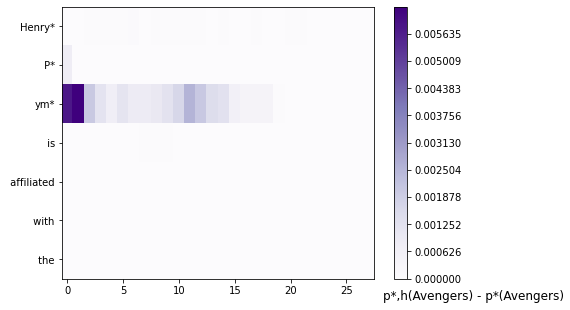

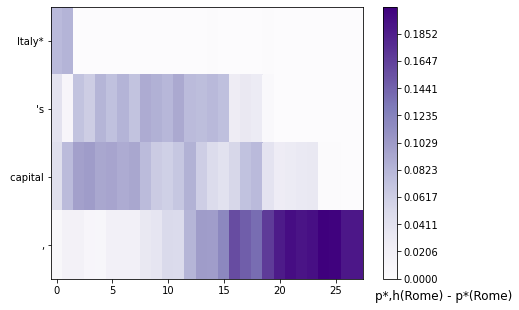

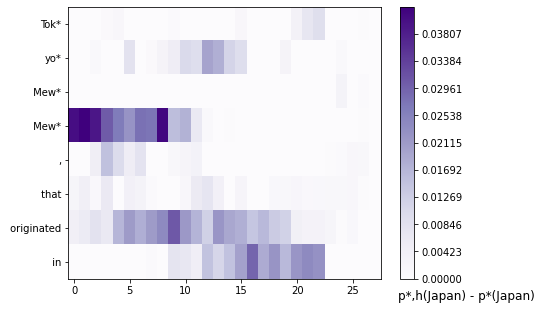

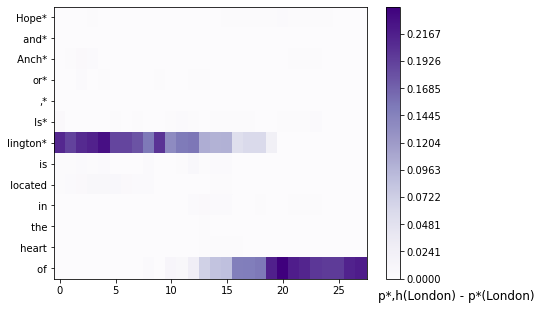

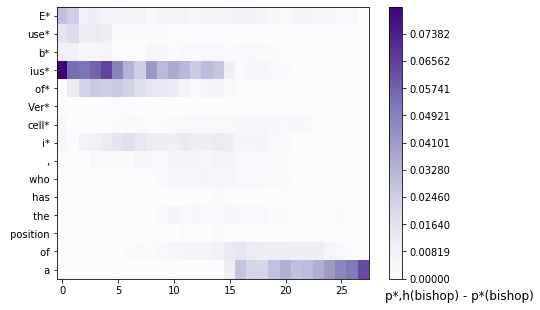

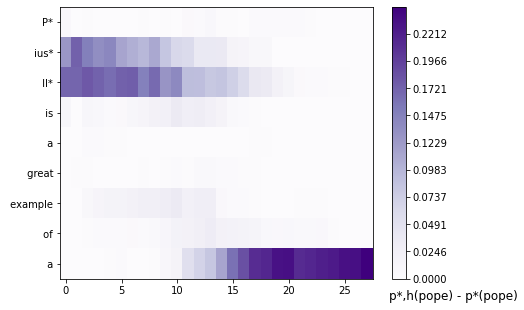

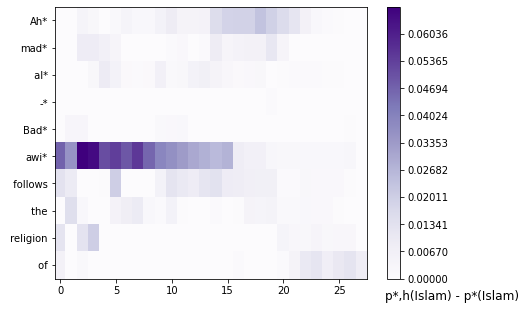

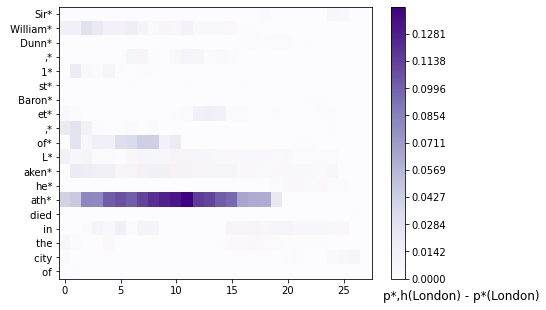

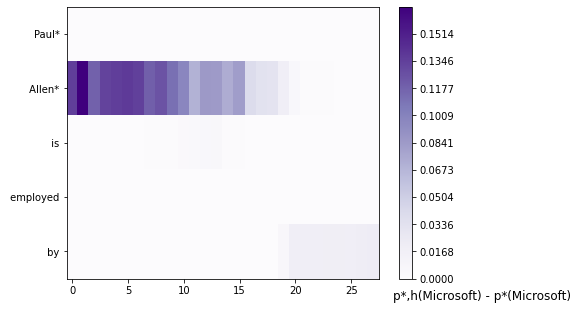

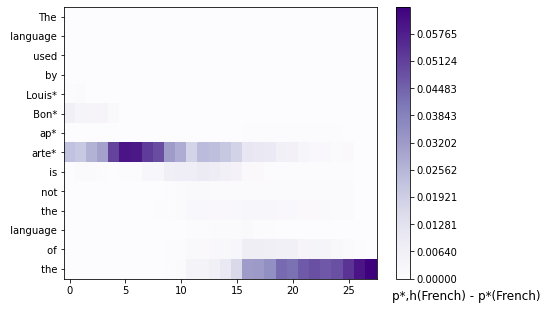

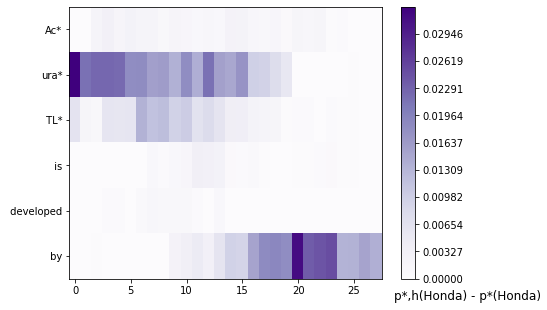

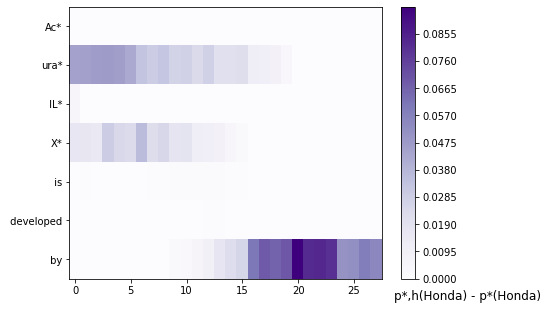

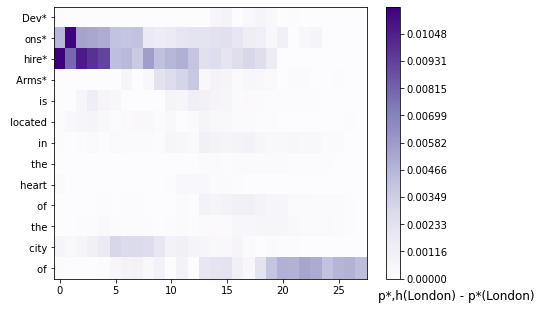

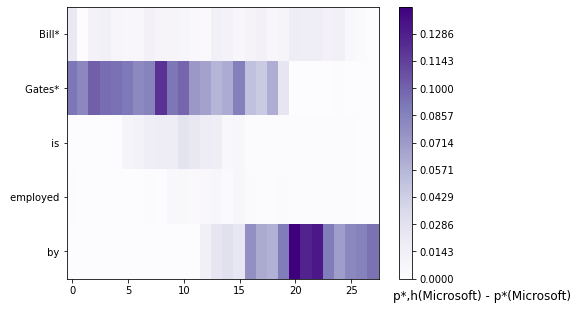

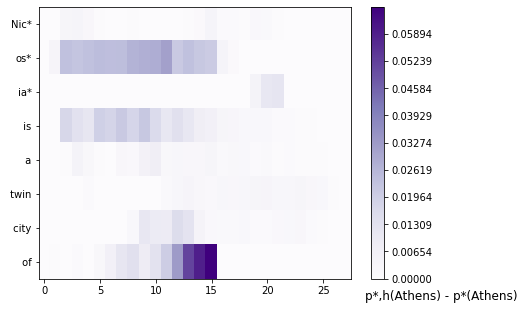

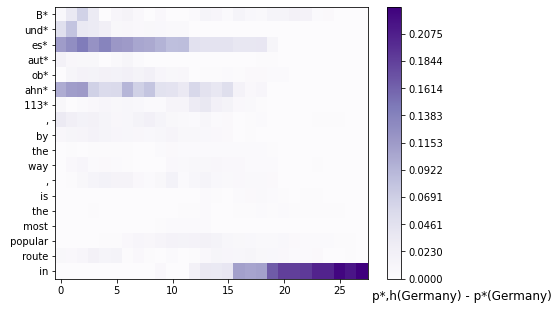

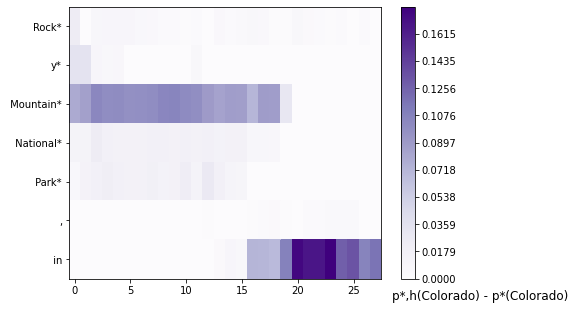

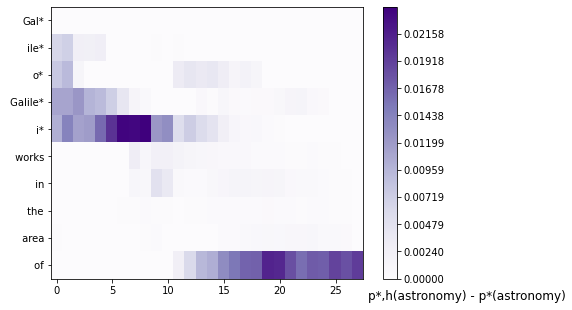

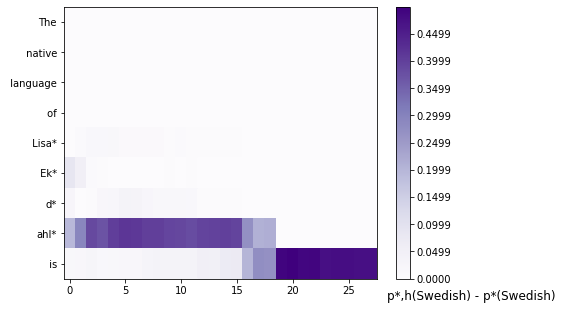

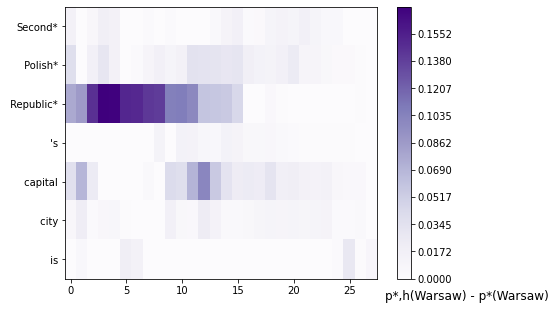

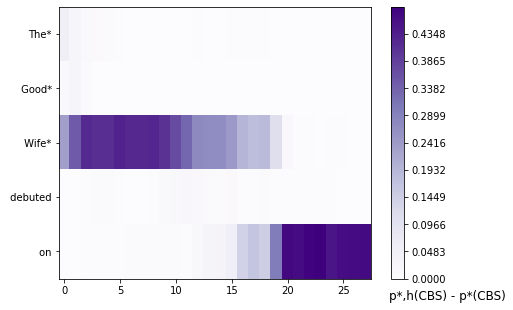

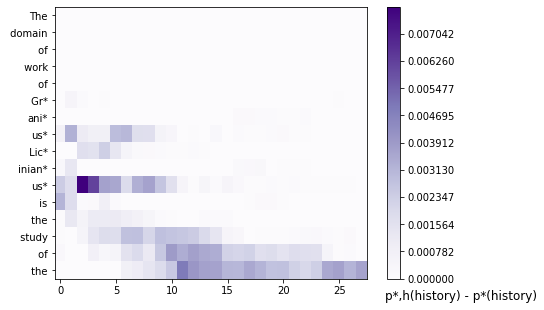

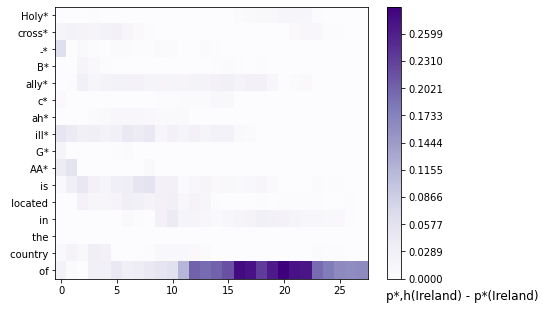

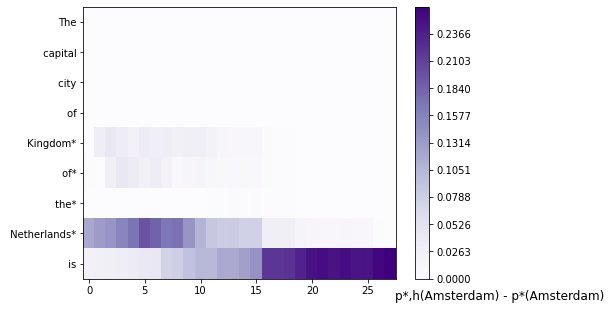

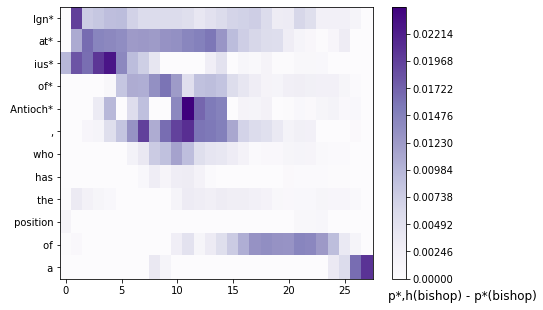

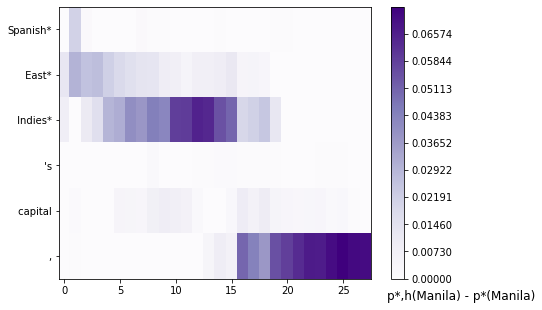

In [4]:
# zero cutoff
for prob, access in res:
    text, tkens, num_layers, _, _ = access
    x = num_layers
    y = tkens
    lower_bound = 0
    upper_bound = torch.max(prob).item()
    incr = (upper_bound - lower_bound) / 10000
    token = text.split()[-1]
    title = f"p*,h({token}) - p*({token})"
    color_schema = "Purples"
    
    utility.plot_results(prob, x, y, lower_bound, upper_bound, incr, title, color_schema)